<a href="https://colab.research.google.com/github/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/blob/main/SCIENTIFIC_DATA_ANALYSIS_DEFINITIVE_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [ ]:
## Análise dos dados transmitidos sobre a energia elétrica (sem anomalias):
url = 'https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption.csv'
df = pd.read_csv(url)
df

Datetime  Temperature  Humidity  WindSpeed  \
0         1/1/2017 0:00        6.559      73.8      0.083   
1         1/1/2017 0:10        6.414      74.5      0.083   
2         1/1/2017 0:20        6.313      74.5      0.080   
3         1/1/2017 0:30        6.121      75.0      0.083   
4         1/1/2017 0:40        5.921      75.7      0.081   
...                 ...          ...       ...        ...   
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.100             29128.10127   
3                    0.091         0.096             28228.86076   
4                    0.048         0.085             27335.69620   
...                    ...           ...                     ...   
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
0                 16128.87538             20240.96386  
1                 19375.07599             20131.08434  
2                 19006.68693             19668.43373  
3                 18361.09422             18899.27711  
4                 17872.34043             18442.40964  
...                       ...                     ...  
52411             26857.31820             14780.31212  
52412             26124.57809             14428.81152  
52413             25277.69254             13806.48259  
52414             24692.23688             13512.60504  
52415             24055.23167             13345.49820  

[52416 rows x 9 columns]

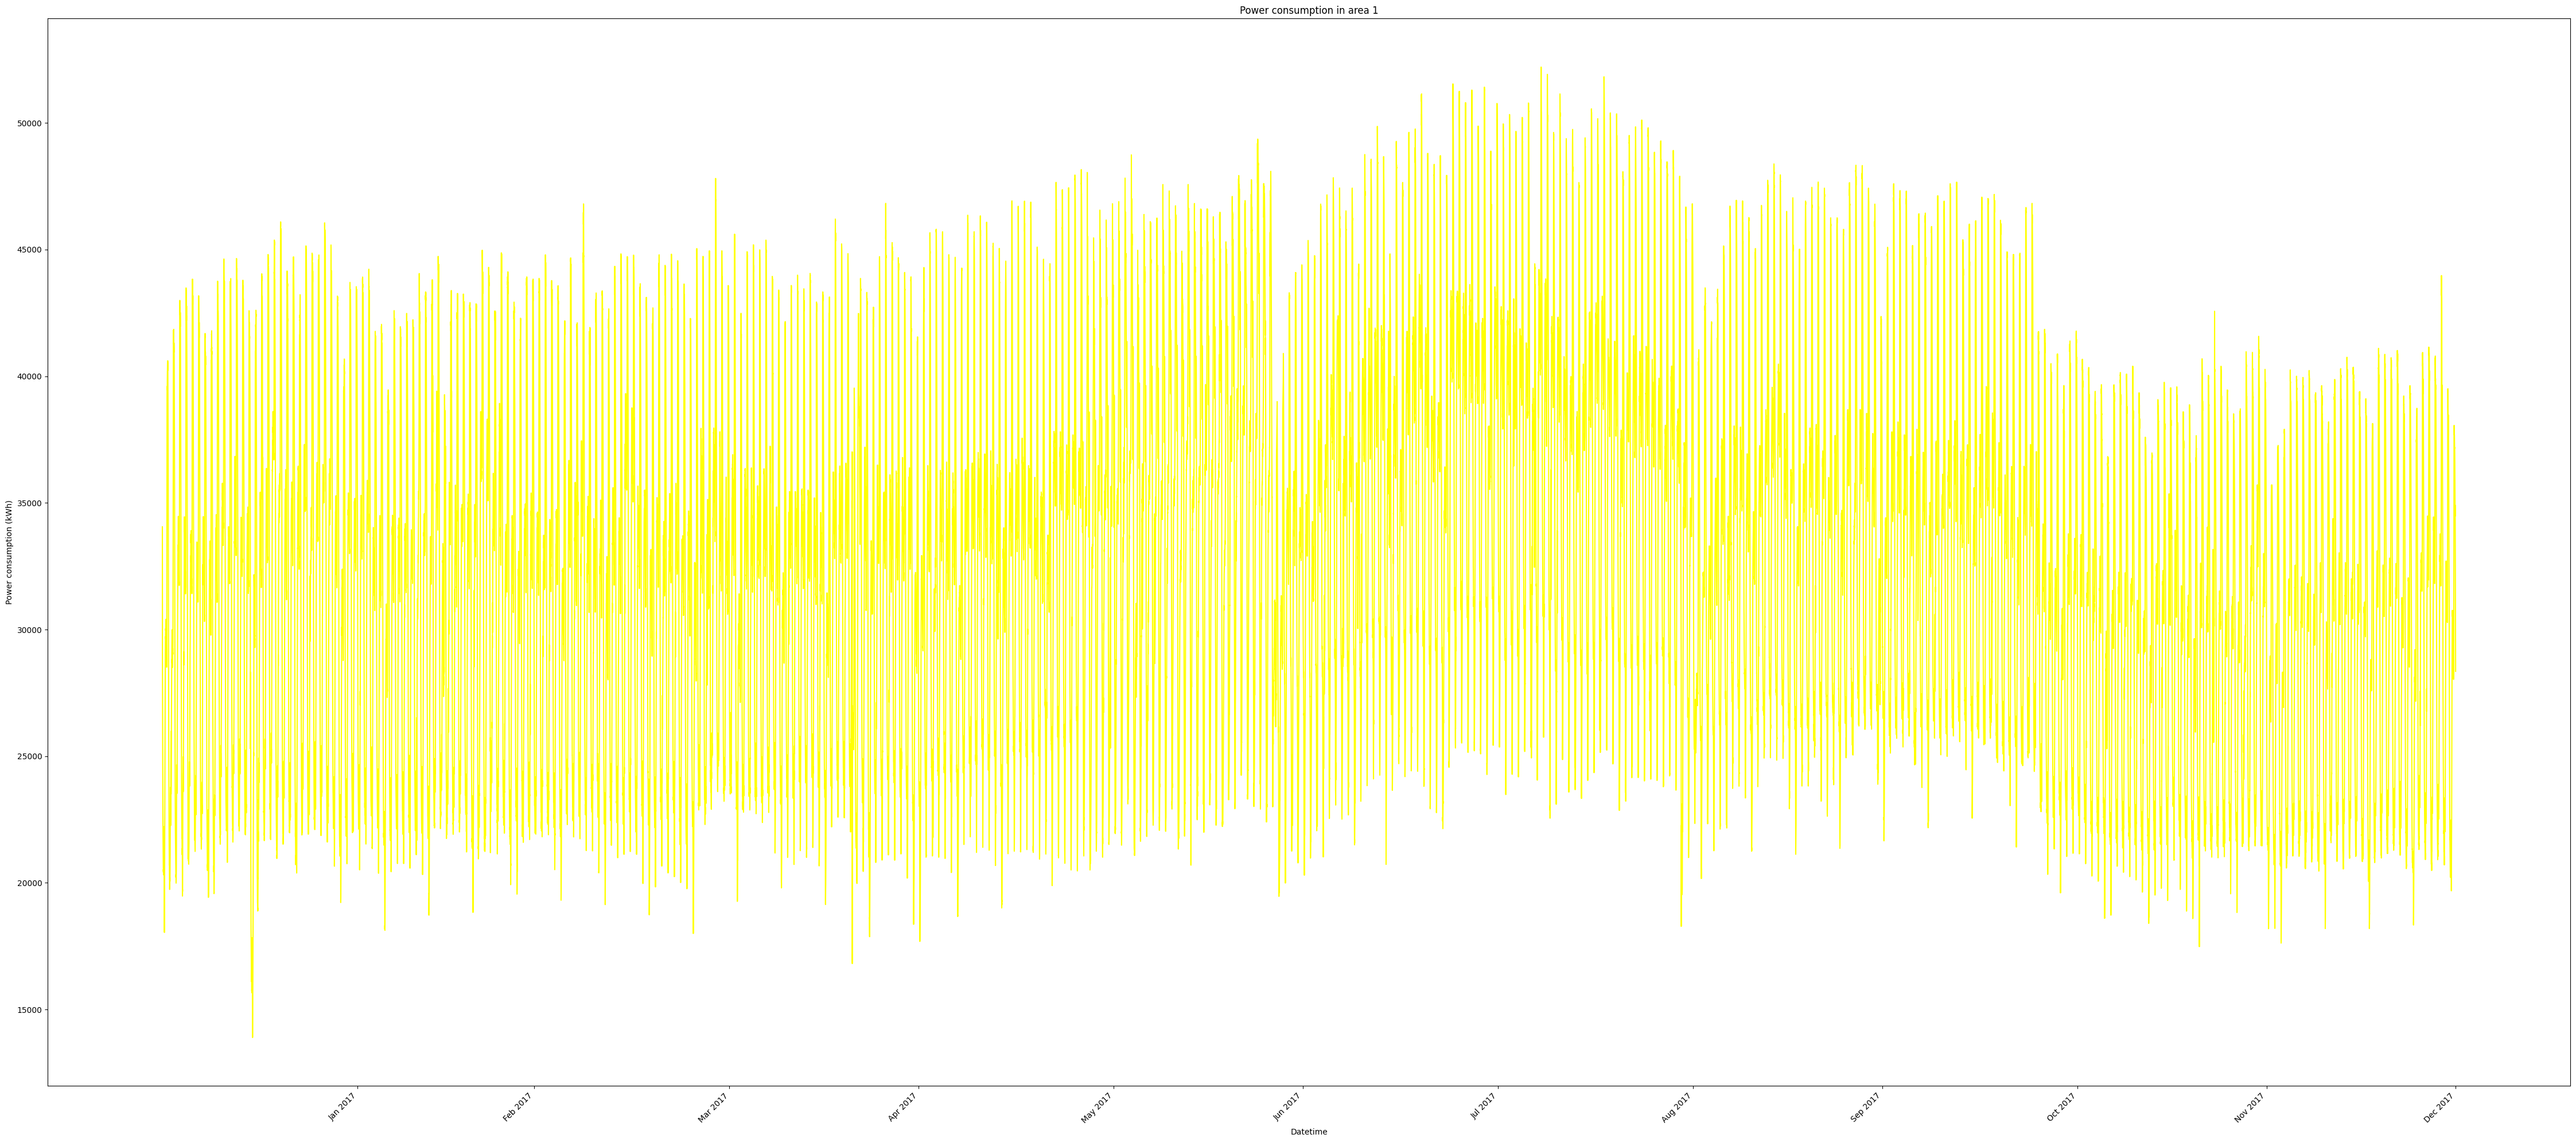

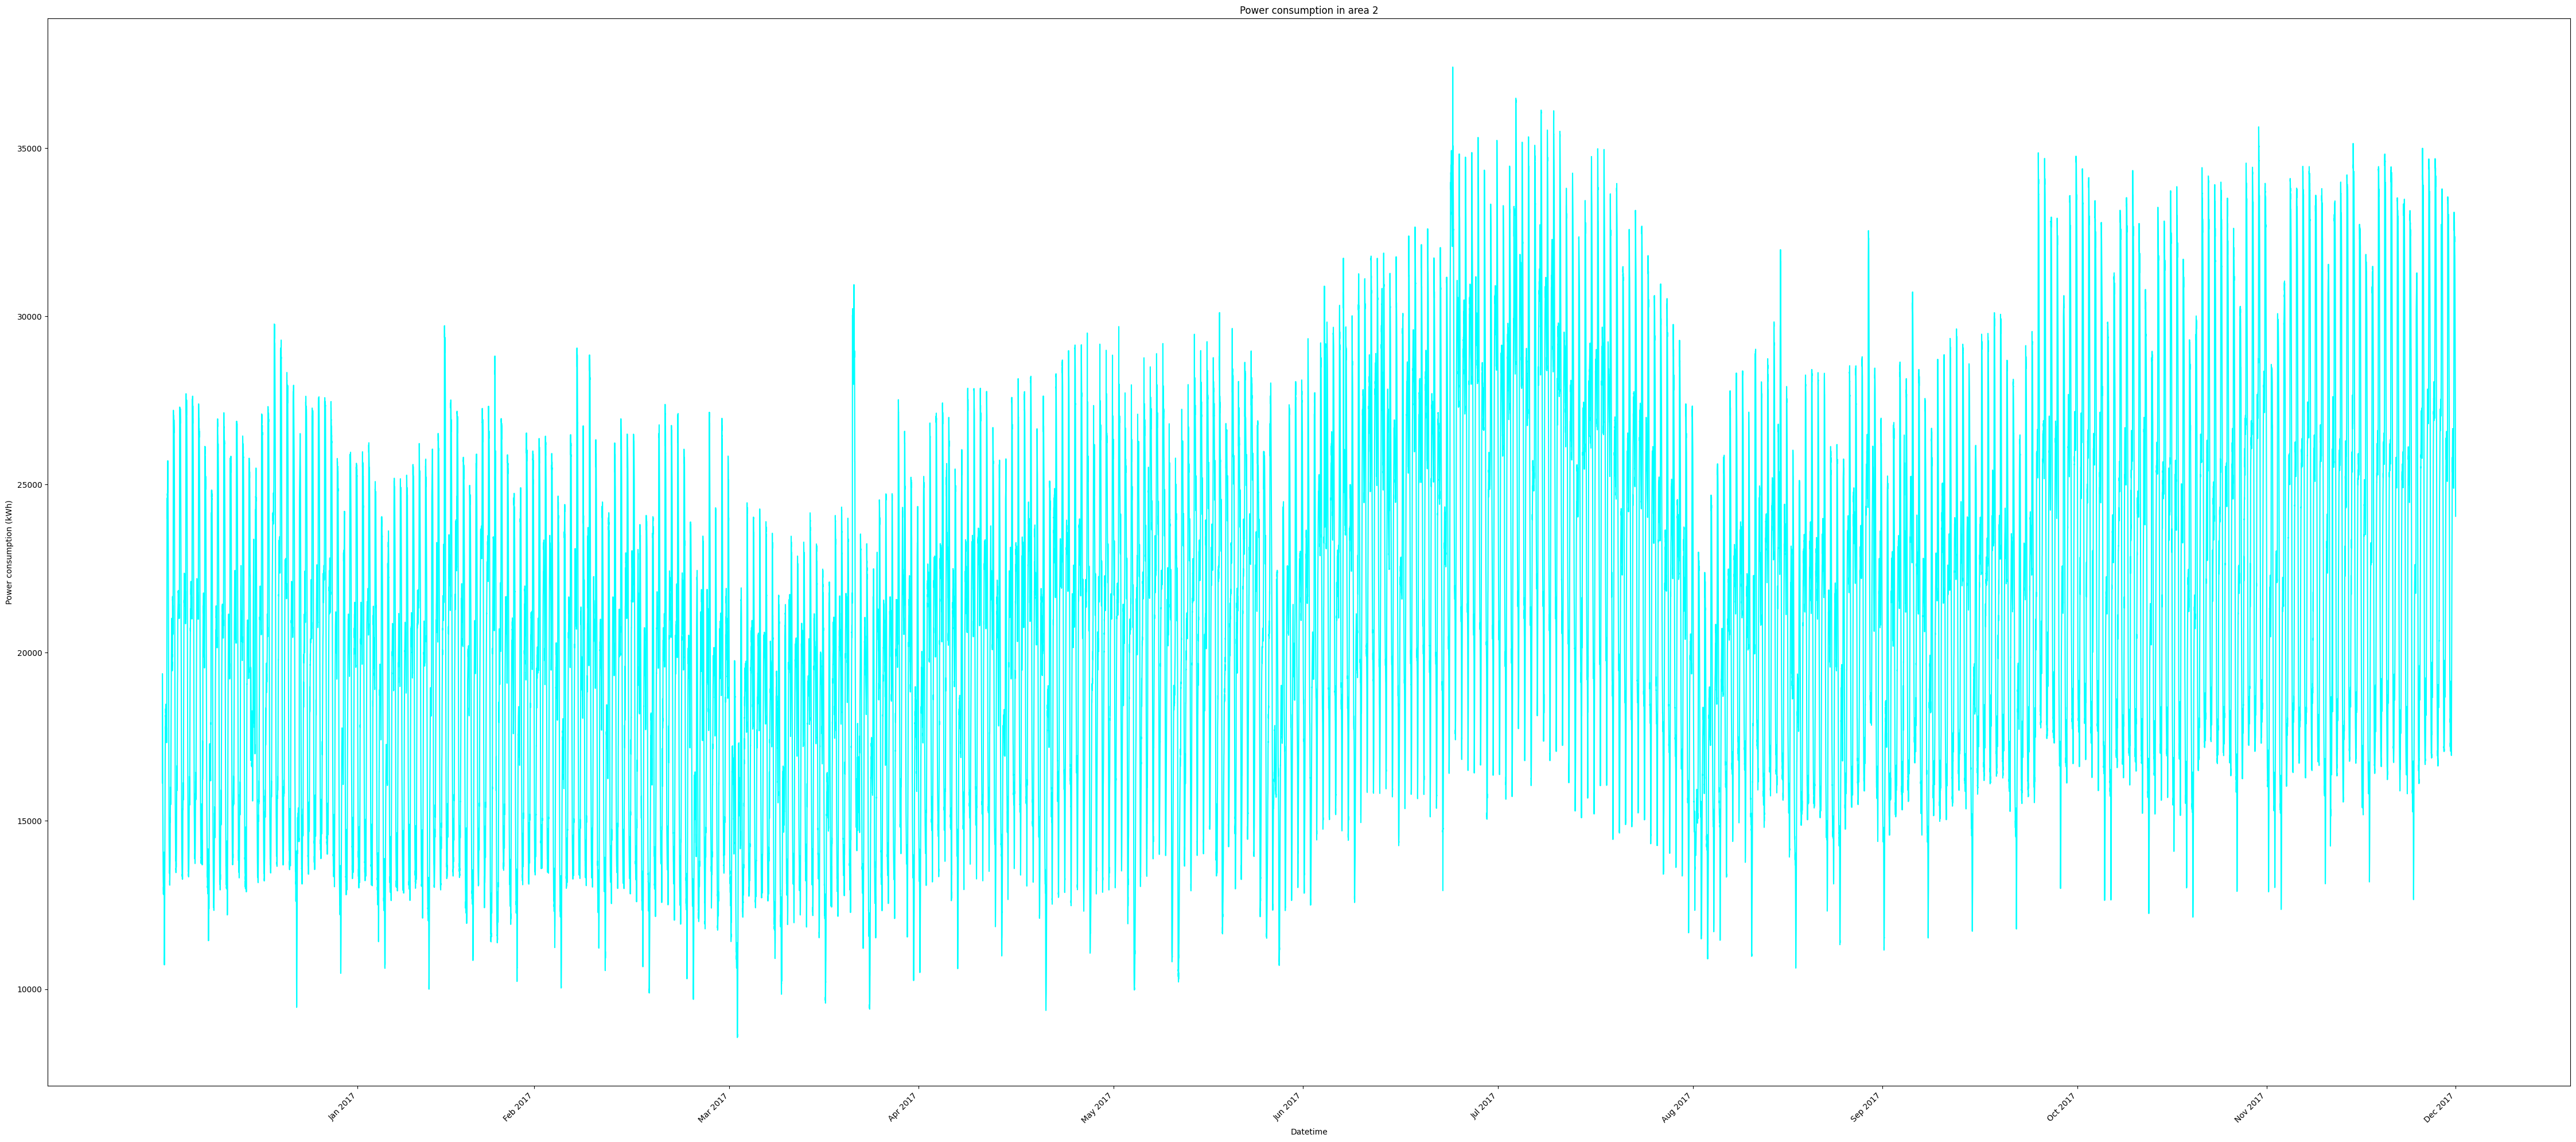

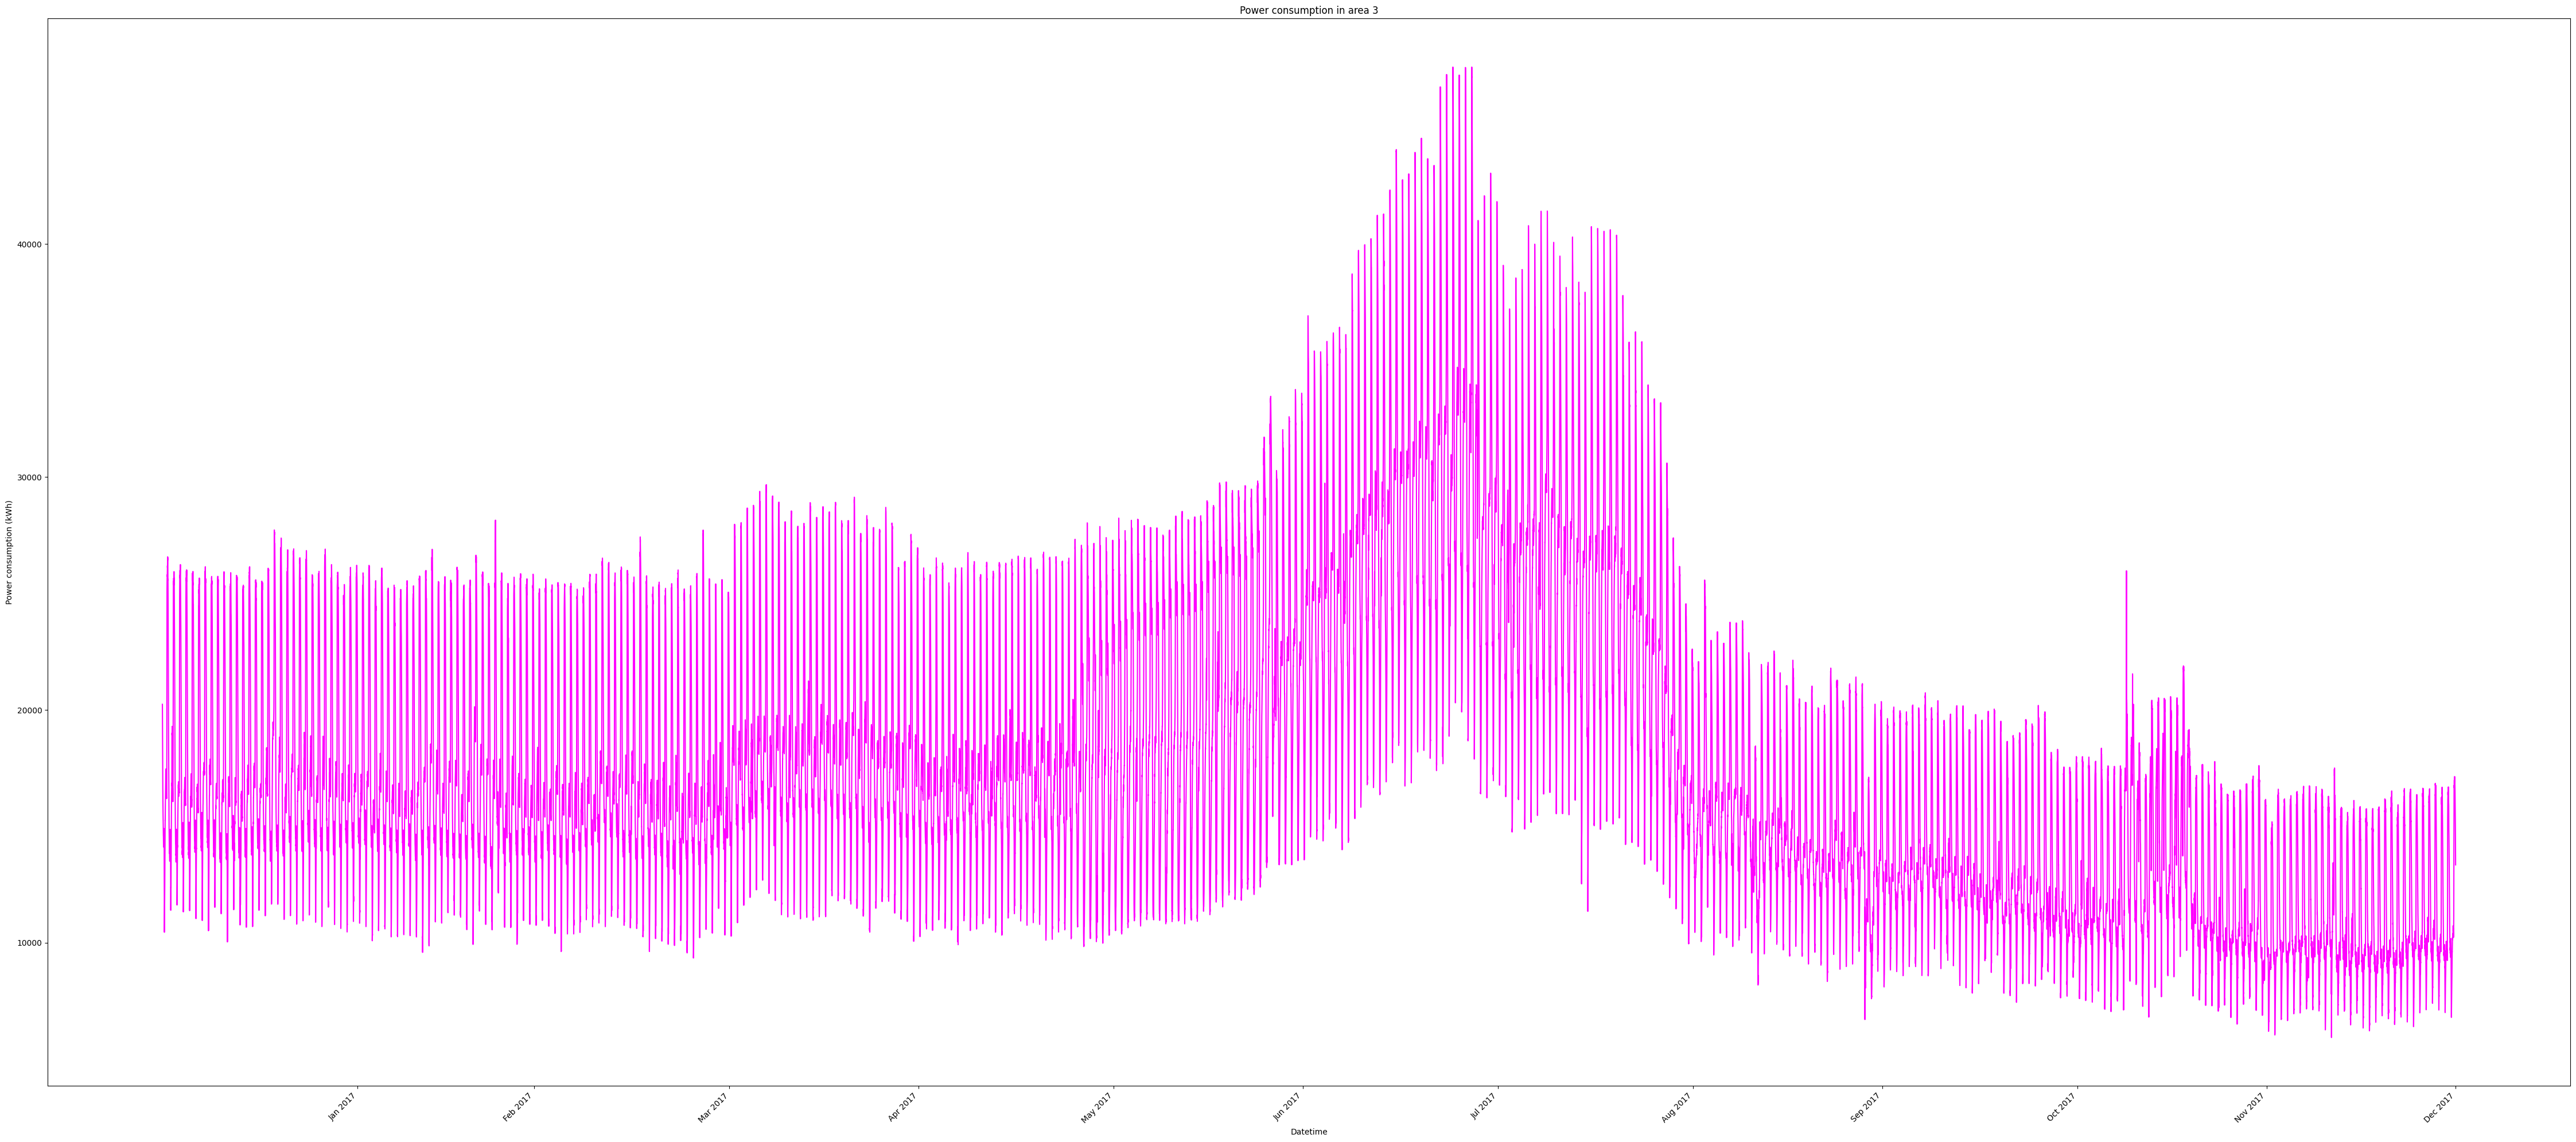

In [ ]:
## Gráficos relacionados as zonas de consumos de energia

## Zona 1
plt.figure(figsize=(45, 20))
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month_Year'] = df['Datetime'].dt.to_period("M")
month_ends = df.groupby('Month_Year')['Datetime'].max()
plt.plot(df['Datetime'], df['PowerConsumption_Zone1'], color='yellow')
plt.title('Power consumption in area 1')
plt.xlabel('Datetime')
plt.ylabel('Power consumption (kWh)')
plt.xticks(month_ends, month_ends.dt.strftime('%b %Y'), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Zona 2
plt.figure(figsize=(45, 20))
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month_Year'] = df['Datetime'].dt.to_period("M")
month_ends = df.groupby('Month_Year')['Datetime'].max()
plt.plot(df['Datetime'], df['PowerConsumption_Zone2'], color='cyan')
plt.title('Power consumption in area 2')
plt.xlabel('Datetime')
plt.ylabel('Power consumption (kWh)')
plt.xticks(month_ends, month_ends.dt.strftime('%b %Y'), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Zona 3
plt.figure(figsize=(45, 20))
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month_Year'] = df['Datetime'].dt.to_period("M")
month_ends = df.groupby('Month_Year')['Datetime'].max()
plt.plot(df['Datetime'], df['PowerConsumption_Zone3'], color='magenta')
plt.title('Power consumption in area 3')
plt.xlabel('Datetime')
plt.ylabel('Power consumption (kWh)')
plt.xticks(month_ends, month_ends.dt.strftime('%b %Y'), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nomes das colunas disponíveis no DataFrame:
Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Month_Year'],
      dtype='object')
As seguintes colunas não foram encontradas: {'Windspeed'}


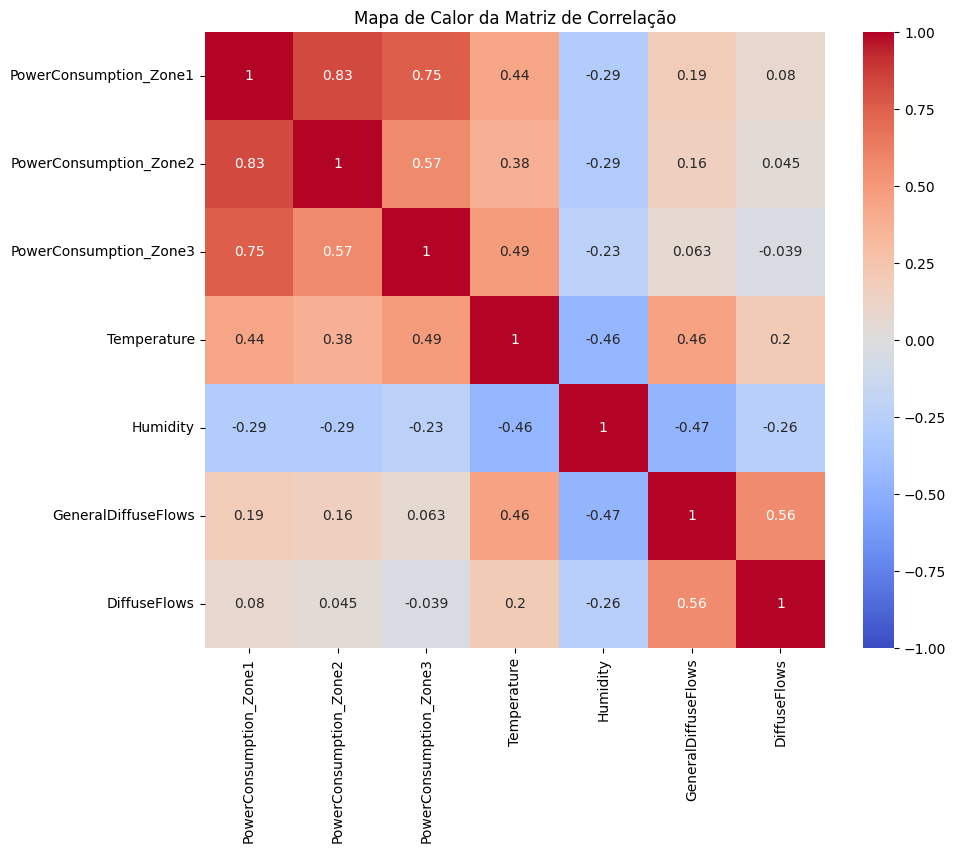

In [ ]:
## Matriz de correlação entre os tipos de dados de toda a base

print("Nomes das colunas disponíveis no DataFrame:")
print(df.columns)
colunas_interesse = [
    'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3',
    'Temperature', 'Humidity', 'Windspeed', 'GeneralDiffuseFlows', 'DiffuseFlows'
]
colunas_existentes = [col for col in colunas_interesse if col in df.columns]
colunas_nao_encontradas = set(colunas_interesse) - set(colunas_existentes)
if colunas_nao_encontradas:
    print(f"As seguintes colunas não foram encontradas: {colunas_nao_encontradas}")
df_selecionado = df[colunas_existentes]
matriz_correlacao = df_selecionado.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

Pela matriz de correlação, conclui-se que os dados relacionados a temperatura, humidade e fluxos difusos não tem grandes correlações com o consumo de energia nas três zonas de consumo, logo, eles não serão relevantes para as análises deste trabalho. A matriz de correlação também demonstra que o consumo de energia entre as zonas também é diferente.

In [ ]:
## Cálculo de dados estatísticos dos dados de energia coletados

if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])  # Converter para formato datetime
else:
    raise ValueError("A coluna 'Datetime' não foi encontrada no DataFrame.")

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Weekday'] = df['Datetime'].dt.day_name()

zonas = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

def calcular_estatisticas(grupo):
    estatisticas = []
    for zona in zonas:
        if zona in grupo:
            dados = grupo[zona].dropna()

            # Cálculo da moda com tratamento robusto
            try:
                moda_valor = mode(dados, nan_policy='omit')
                moda_final = moda_valor.mode[0] if moda_valor.count.size > 0 and moda_valor.count[0] > 0 else np.nan
            except:
                moda_final = np.nan

            estatisticas.append({
                'Zona': zona,
                'Média': np.mean(dados),
                'Mediana': np.median(dados),
                'Moda': moda_final,
                'Variância': np.var(dados, ddof=1),
                'Desvio Padrão': np.std(dados, ddof=1),
                'Coeficiente de Variação (%)': (np.std(dados, ddof=1) / np.mean(dados)) * 100 if np.mean(dados) != 0 else np.nan
            })
    return estatisticas

def organizar_resultados(agrupamento, nome_agrupamento):
    resultados = []
    for grupo, estatisticas in agrupamento.items():
        for estatistica in estatisticas:
            resultado = estatistica.copy()
            resultado[nome_agrupamento] = grupo
            resultados.append(resultado)
    return pd.DataFrame(resultados)

estatisticas_anuais = df.groupby('Year').apply(calcular_estatisticas).to_dict()
estatisticas_anuais_df = organizar_resultados(estatisticas_anuais, 'Ano')

estatisticas_mensais = df.groupby(['Year', 'Month']).apply(calcular_estatisticas).to_dict()
estatisticas_mensais_df = organizar_resultados(estatisticas_mensais, 'Ano-Mês')

estatisticas_diarias = df.groupby('Weekday').apply(calcular_estatisticas).to_dict()
estatisticas_diarias_df = organizar_resultados(estatisticas_diarias, 'Dia da Semana')

print("\nEstatísticas Anuais:")
display(estatisticas_anuais_df)

print("\nEstatísticas Mensais:")
display(estatisticas_mensais_df)

print("\nEstatísticas Diárias por Dia da Semana:")
display(estatisticas_diarias_df)

estatisticas_anuais_df.to_csv('estatisticas_anuais.csv', index=False)
estatisticas_mensais_df.to_csv('estatisticas_mensais.csv', index=False)
estatisticas_diarias_df.to_csv('estatisticas_diarias.csv', index=False)


Estatísticas Anuais:


<ipython-input-5-fc1e7a954f65>:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estatisticas_anuais = df.groupby('Year').apply(calcular_estatisticas).to_dict()
<ipython-input-5-fc1e7a954f65>:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estatisticas_mensais = df.groupby(['Year', 'Month']).apply(calcular_estatisticas).to_dict()
<ipython-input-5-fc1e7a954f65>:54: DeprecationWarning: DataFrameGroupBy.appl

Zona         Média       Mediana  Moda     Variância  \
0  PowerConsumption_Zone1  32344.970564  32265.920340   NaN  5.084492e+07   
1  PowerConsumption_Zone2  21042.509082  20823.168405   NaN  2.705525e+07   
2  PowerConsumption_Zone3  17835.406218  16415.117470   NaN  4.385307e+07   

   Desvio Padrão  Coeficiente de Variação (%)   Ano  
0    7130.562564                    22.045352  2017  
1    5201.465892                    24.718848  2017  
2    6622.165099                    37.129320  2017


Estatísticas Mensais:


Zona         Média       Mediana  Moda     Variância  \
0   PowerConsumption_Zone1  31032.493535  31692.151900   NaN  5.476411e+07   
1   PowerConsumption_Zone2  19394.444717  19657.750760   NaN  2.045015e+07   
2   PowerConsumption_Zone3  17746.095349  16481.927710   NaN  1.965901e+07   
3   PowerConsumption_Zone1  30985.753632  31609.830510   NaN  4.718375e+07   
4   PowerConsumption_Zone2  18787.793096  19305.775075   NaN  1.928371e+07   
5   PowerConsumption_Zone3  17335.002154  16237.989950   NaN  1.900946e+07   
6   PowerConsumption_Zone1  31155.165408  31692.255320   NaN  4.593795e+07   
7   PowerConsumption_Zone2  18457.937484  18885.365850   NaN  1.748280e+07   
8   PowerConsumption_Zone3  16947.686004  15990.967740   NaN  1.807410e+07   
9   PowerConsumption_Zone1  31169.768210  31769.903120   NaN  4.206379e+07   
10  PowerConsumption_Zone2  17633.966395  17758.044805   NaN  1.469881e+07   
11  PowerConsumption_Zone3  18593.167677  18007.272730   NaN  2.065529e+07   
12  PowerConsumption_Zone1  32396.009166  33024.000000   NaN  4.626365e+07   
13  PowerConsumption_Zone2  19977.287859  20663.777090   NaN  1.746507e+07   
14  PowerConsumption_Zone3  17621.100953  17175.060730   NaN  1.899081e+07   
15  PowerConsumption_Zone1  34605.540839  35450.066230   NaN  5.354030e+07   
16  PowerConsumption_Zone2  20670.928621  21244.490640   NaN  1.986924e+07   
17  PowerConsumption_Zone3  20430.941538  20171.815385   NaN  3.143744e+07   
18  PowerConsumption_Zone1  35831.553603  36307.774085   NaN  4.869226e+07   
19  PowerConsumption_Zone2  24147.886893  24522.151895   NaN  2.466571e+07   
20  PowerConsumption_Zone3  28194.111216  27857.071130   NaN  4.807563e+07   
21  PowerConsumption_Zone1  36435.189574  37417.624860   NaN  4.986611e+07   
22  PowerConsumption_Zone2  24656.216575  25009.926080   NaN  2.660068e+07   
23  PowerConsumption_Zone3  24648.894732  24695.172410   NaN  4.224239e+07   
24  PowerConsumption_Zone1  33396.681416  33288.849560   NaN  4.228843e+07   
25  PowerConsumption_Zone2  20180.432259  20176.091475   NaN  1.781965e+07   
26  PowerConsumption_Zone3  14922.798774  14252.911135   NaN  1.182423e+07   
27  PowerConsumption_Zone1  32827.660055  32631.597370   NaN  4.214038e+07   
28  PowerConsumption_Zone2  21468.993441  21570.124480   NaN  2.130678e+07   
29  PowerConsumption_Zone3  13264.095173  12541.276600   NaN  9.566346e+06   
30  PowerConsumption_Zone1  29002.106838  29403.076920   NaN  3.484160e+07   
31  PowerConsumption_Zone2  23240.464015  23039.256200   NaN  2.950721e+07   
32  PowerConsumption_Zone3  12862.496653  11687.710840   NaN  1.232028e+07   
33  PowerConsumption_Zone1  29024.168427  29320.152095   NaN  3.814793e+07   
34  PowerConsumption_Zone2  23681.852818  23633.629945   NaN  3.262456e+07   
35  PowerConsumption_Zone3  11044.805922   9896.758703   NaN  8.141845e+06   

    Desvio Padrão  Coeficiente de Variação (%)     Ano-Mês  
0     7400.277974                    23.846869   (2017, 1)  
1     4522.184101                    23.316904   (2017, 1)  
2     4433.847680                    24.984920   (2017, 1)  
3     6869.042633                    22.168390   (2017, 2)  
4     4391.322168                    23.373273   (2017, 2)  
5     4359.983745                    25.151331   (2017, 2)  
6     6777.753954                    21.754832   (2017, 3)  
7     4181.243776                    22.652822   (2017, 3)  
8     4251.364622                    25.085222   (2017, 3)  
9     6485.660448                    20.807535   (2017, 4)  
10    3833.902391                    21.741577   (2017, 4)  
11    4544.808792                    24.443435   (2017, 4)  
12    6801.738885                    20.995607   (2017, 5)  
13    4179.123200                    20.919372   (2017, 5)  
14    4357.844657                    24.730831   (2017, 5)  
15    7317.124026                    21.144371   (2017, 6)  
16    4457.492438                    21.564065   (2017, 6)  
17    5606.910346                    


Estatísticas Diárias por Dia da Semana:


Zona         Média       Mediana  Moda     Variância  \
0   PowerConsumption_Zone1  32338.995905  32256.000000   NaN  4.830645e+07   
1   PowerConsumption_Zone2  21461.038263  21378.358790   NaN  2.386639e+07   
2   PowerConsumption_Zone3  17545.971382  16046.236365   NaN  4.272118e+07   
3   PowerConsumption_Zone1  32615.410633  32667.877355   NaN  5.196421e+07   
4   PowerConsumption_Zone2  21280.065085  20942.469790   NaN  2.745789e+07   
5   PowerConsumption_Zone3  17809.081562  16456.306680   NaN  4.304018e+07   
6   PowerConsumption_Zone1  32253.034345  32239.847650   NaN  4.939018e+07   
7   PowerConsumption_Zone2  20585.955724  20329.858995   NaN  2.508308e+07   
8   PowerConsumption_Zone3  18011.187469  16688.931210   NaN  4.520629e+07   
9   PowerConsumption_Zone1  30780.079481  30387.780380   NaN  4.998957e+07   
10  PowerConsumption_Zone2  18979.377434  18204.294845   NaN  2.611624e+07   
11  PowerConsumption_Zone3  17954.827782  16584.483180   NaN  4.469186e+07   
12  PowerConsumption_Zone1  32842.484416  32917.355155   NaN  5.100097e+07   
13  PowerConsumption_Zone2  21845.164469  21521.981420   NaN  2.771614e+07   
14  PowerConsumption_Zone3  17843.692103  16462.905160   NaN  4.328911e+07   
15  PowerConsumption_Zone1  32713.030148  32673.310140   NaN  5.078961e+07   
16  PowerConsumption_Zone2  21518.599887  21231.834085   NaN  2.662929e+07   
17  PowerConsumption_Zone3  17831.688173  16412.530120   NaN  4.419614e+07   
18  PowerConsumption_Zone1  32871.759018  32985.145320   NaN  5.132279e+07   
19  PowerConsumption_Zone2  21627.362715  21445.083950   NaN  2.662907e+07   
20  PowerConsumption_Zone3  17851.395059  16446.810440   NaN  4.373191e+07   

    Desvio Padrão  Coeficiente de Variação (%) Dia da Semana  
0     6950.284262                    21.491961        Friday  
1     4885.324431                    22.763691        Friday  
2     6536.143788                    37.251536        Friday  
3     7208.620315                    22.101884        Monday  
4     5240.027552                    24.624114        Monday  
5     6560.501556                    36.837956        Monday  
6     7027.814940                    21.789624      Saturday  
7     5008.300893                    24.328727      Saturday  
8     6723.562049                    37.329921      Saturday  
9     7070.330103                    22.970474        Sunday  
10    5110.405187                    26.926095        Sunday  
11    6685.196866                    37.233422        Sunday  
12    7141.496243                    21.744689      Thursday  
13    5264.612514                    24.099670      Thursday  
14    6579.446319                    36.872673      Thursday  
15    7126.682852                    21.785456       Tuesday  
16    5160.357091                    23.980915       Tuesday  
17    6648.017385                    37.282042       Tuesday  
18    7163.992465                    21.793761     Wednesday  
19    5160.335948                    23.860218     Wednesday  
20    6613.010432                    37.044782     Wednesday

<ipython-input-6-af3c52cf4320>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[zone].resample(freq).mean()


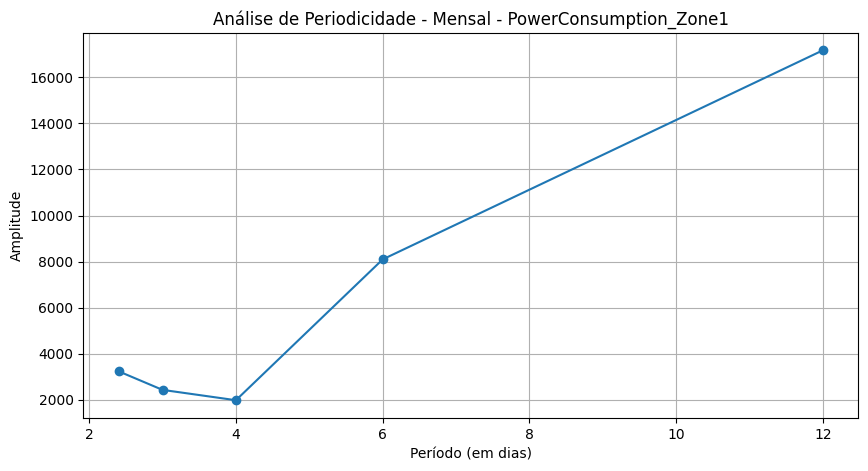

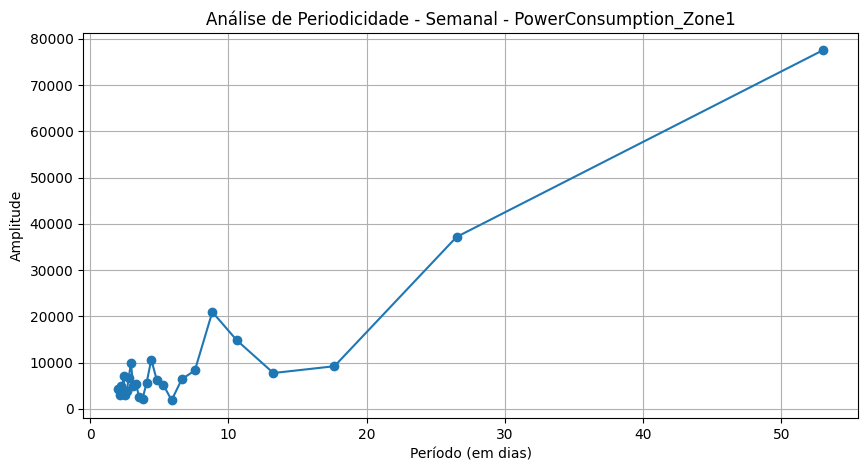

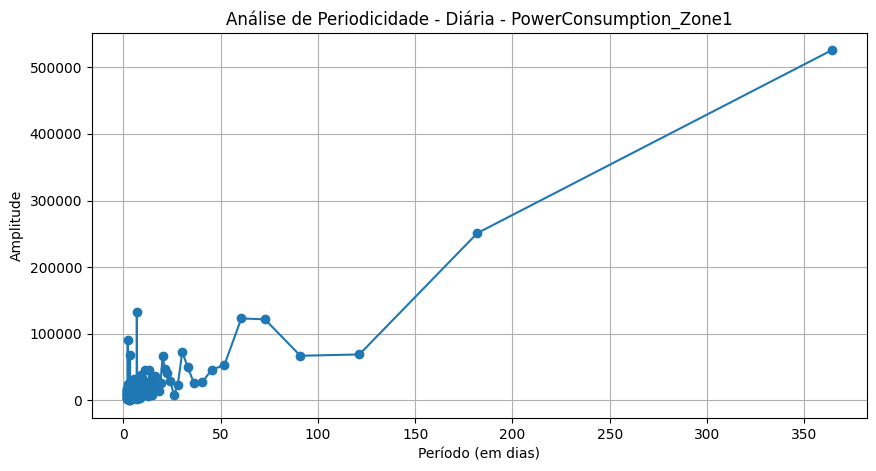

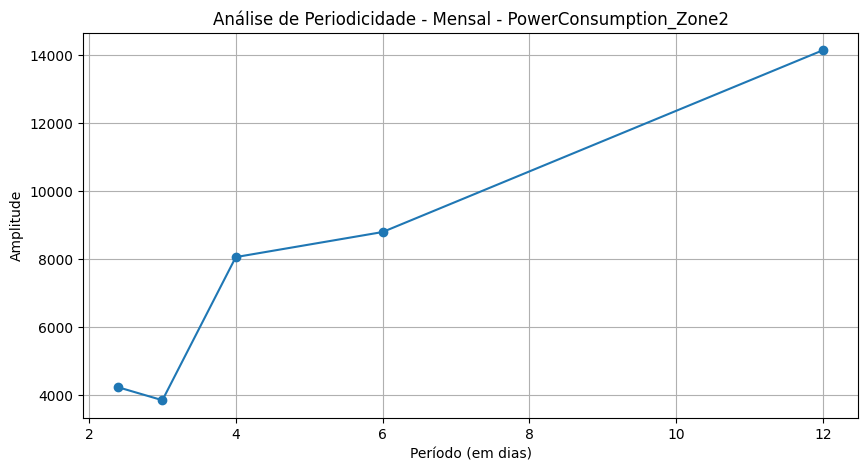

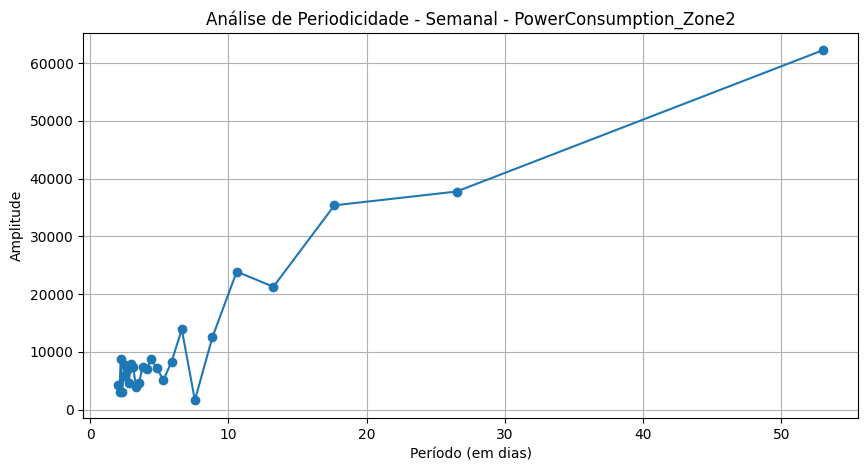

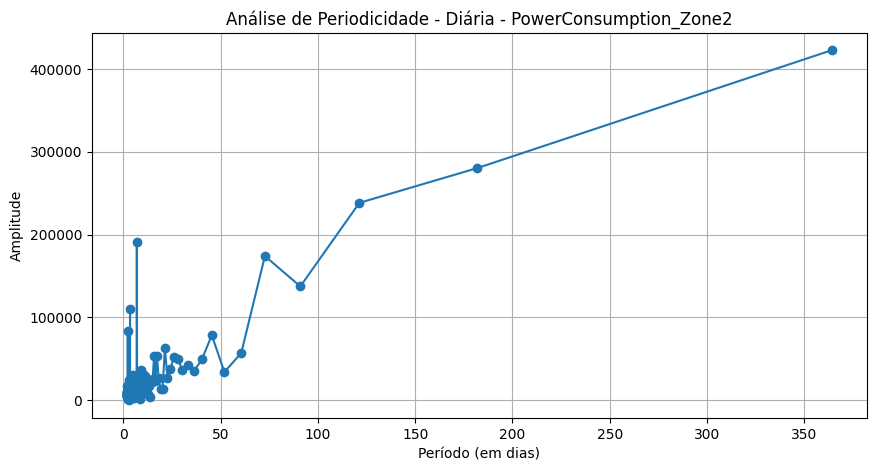

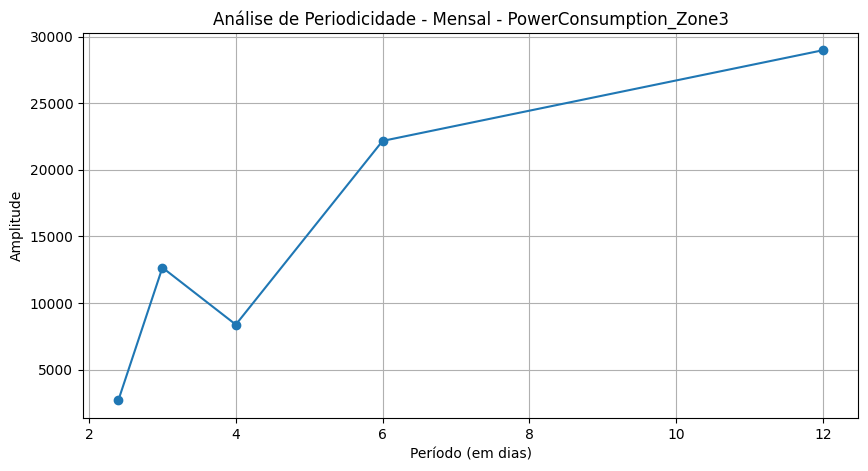

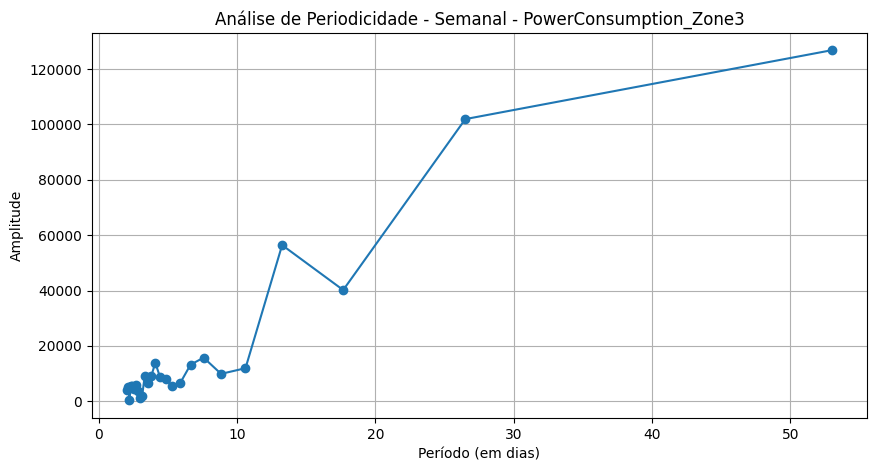

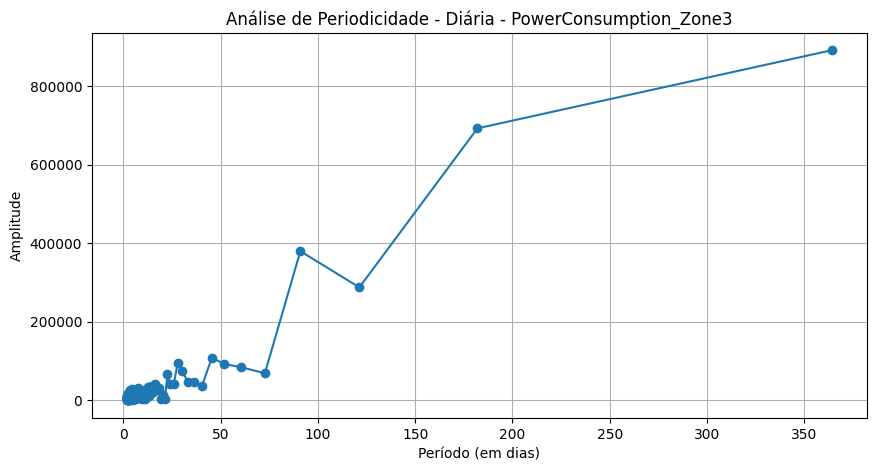

In [ ]:
# Função para realizar análise FFT e visualizar periodicidades
def analyze_fft(df, zone, freq, title):
    """
    Realiza a análise FFT para uma zona de consumo e plota o gráfico da periodicidade.

    Parâmetros:
        df (pd.DataFrame): Conjunto de dados.
        zone (str): Nome da zona de consumo.
        freq (str): Frequência de reamostragem ('D', 'W', 'M' etc.).
        title (str): Título do gráfico.
    """
    # Verificar se o índice já é 'Datetime', caso contrário, configurá-lo
    if 'Datetime' in df.columns:
        df = df.set_index('Datetime')

    # Reamostrar os dados na frequência desejada e calcular a média
    resampled = df[zone].resample(freq).mean()

    # Aplicar a FFT
    fft_values = np.fft.fft(resampled - resampled.mean())
    fft_freq = np.fft.fftfreq(len(fft_values))

    # Frequência positiva apenas
    mask = fft_freq > 0
    fft_values = fft_values[mask]
    fft_freq = fft_freq[mask]

    # Plotar os resultados
    plt.figure(figsize=(10, 5))
    plt.plot(1 / fft_freq, np.abs(fft_values), marker='o')
    plt.title(f"Análise de Periodicidade - {title}")
    plt.xlabel("Período (em dias)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Executar FFT para cada zona em cada periodicidade
frequencias = ['M', 'W', 'D']  # Mensal, semanal e diária
labels = ['Mensal', 'Semanal', 'Diária']

for zona in zonas:
    for freq, label in zip(frequencias, labels):
        analyze_fft(df, zona, freq, f"{label} - {zona}")

In [ ]:
## Análise dos dados transmitidos sobre a energia elétrica (com anomalias):
url = 'https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption_modified.csv'
df = pd.read_csv(url)
df

Datetime  Temperature  Humidity  WindSpeed  \
0      2017-01-01 00:00:00        6.559      73.8      0.083   
1      2017-01-01 00:10:00        6.414      74.5      0.083   
2      2017-01-01 00:20:00        6.313      74.5      0.080   
3      2017-01-01 00:30:00        6.121      75.0      0.083   
4      2017-01-01 00:40:00        5.921      75.7      0.081   
...                    ...          ...       ...        ...   
52411  2017-12-30 23:10:00        7.010      72.4      0.080   
52412  2017-12-30 23:20:00        6.947      72.6      0.082   
52413  2017-12-30 23:30:00        6.900      72.8      0.086   
52414  2017-12-30 23:40:00        6.758      73.0      0.080   
52415  2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.100             29128.10127   
3                    0.091         0.096             28228.86076   
4                    0.048         0.085             27335.69620   
...                    ...           ...                     ...   
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
0                 16128.87538             20240.96386  
1                 19375.07599             20131.08434  
2                 19006.68693             19668.43373  
3                 18361.09422             18899.27711  
4                 17872.34043             18442.40964  
...                       ...                     ...  
52411             26857.31820             14780.31212  
52412             26124.57809             14428.81152  
52413             25277.69254             13806.48259  
52414             24692.23688             13512.60504  
52415             24055.23167             13345.49820  

[52416 rows x 9 columns]

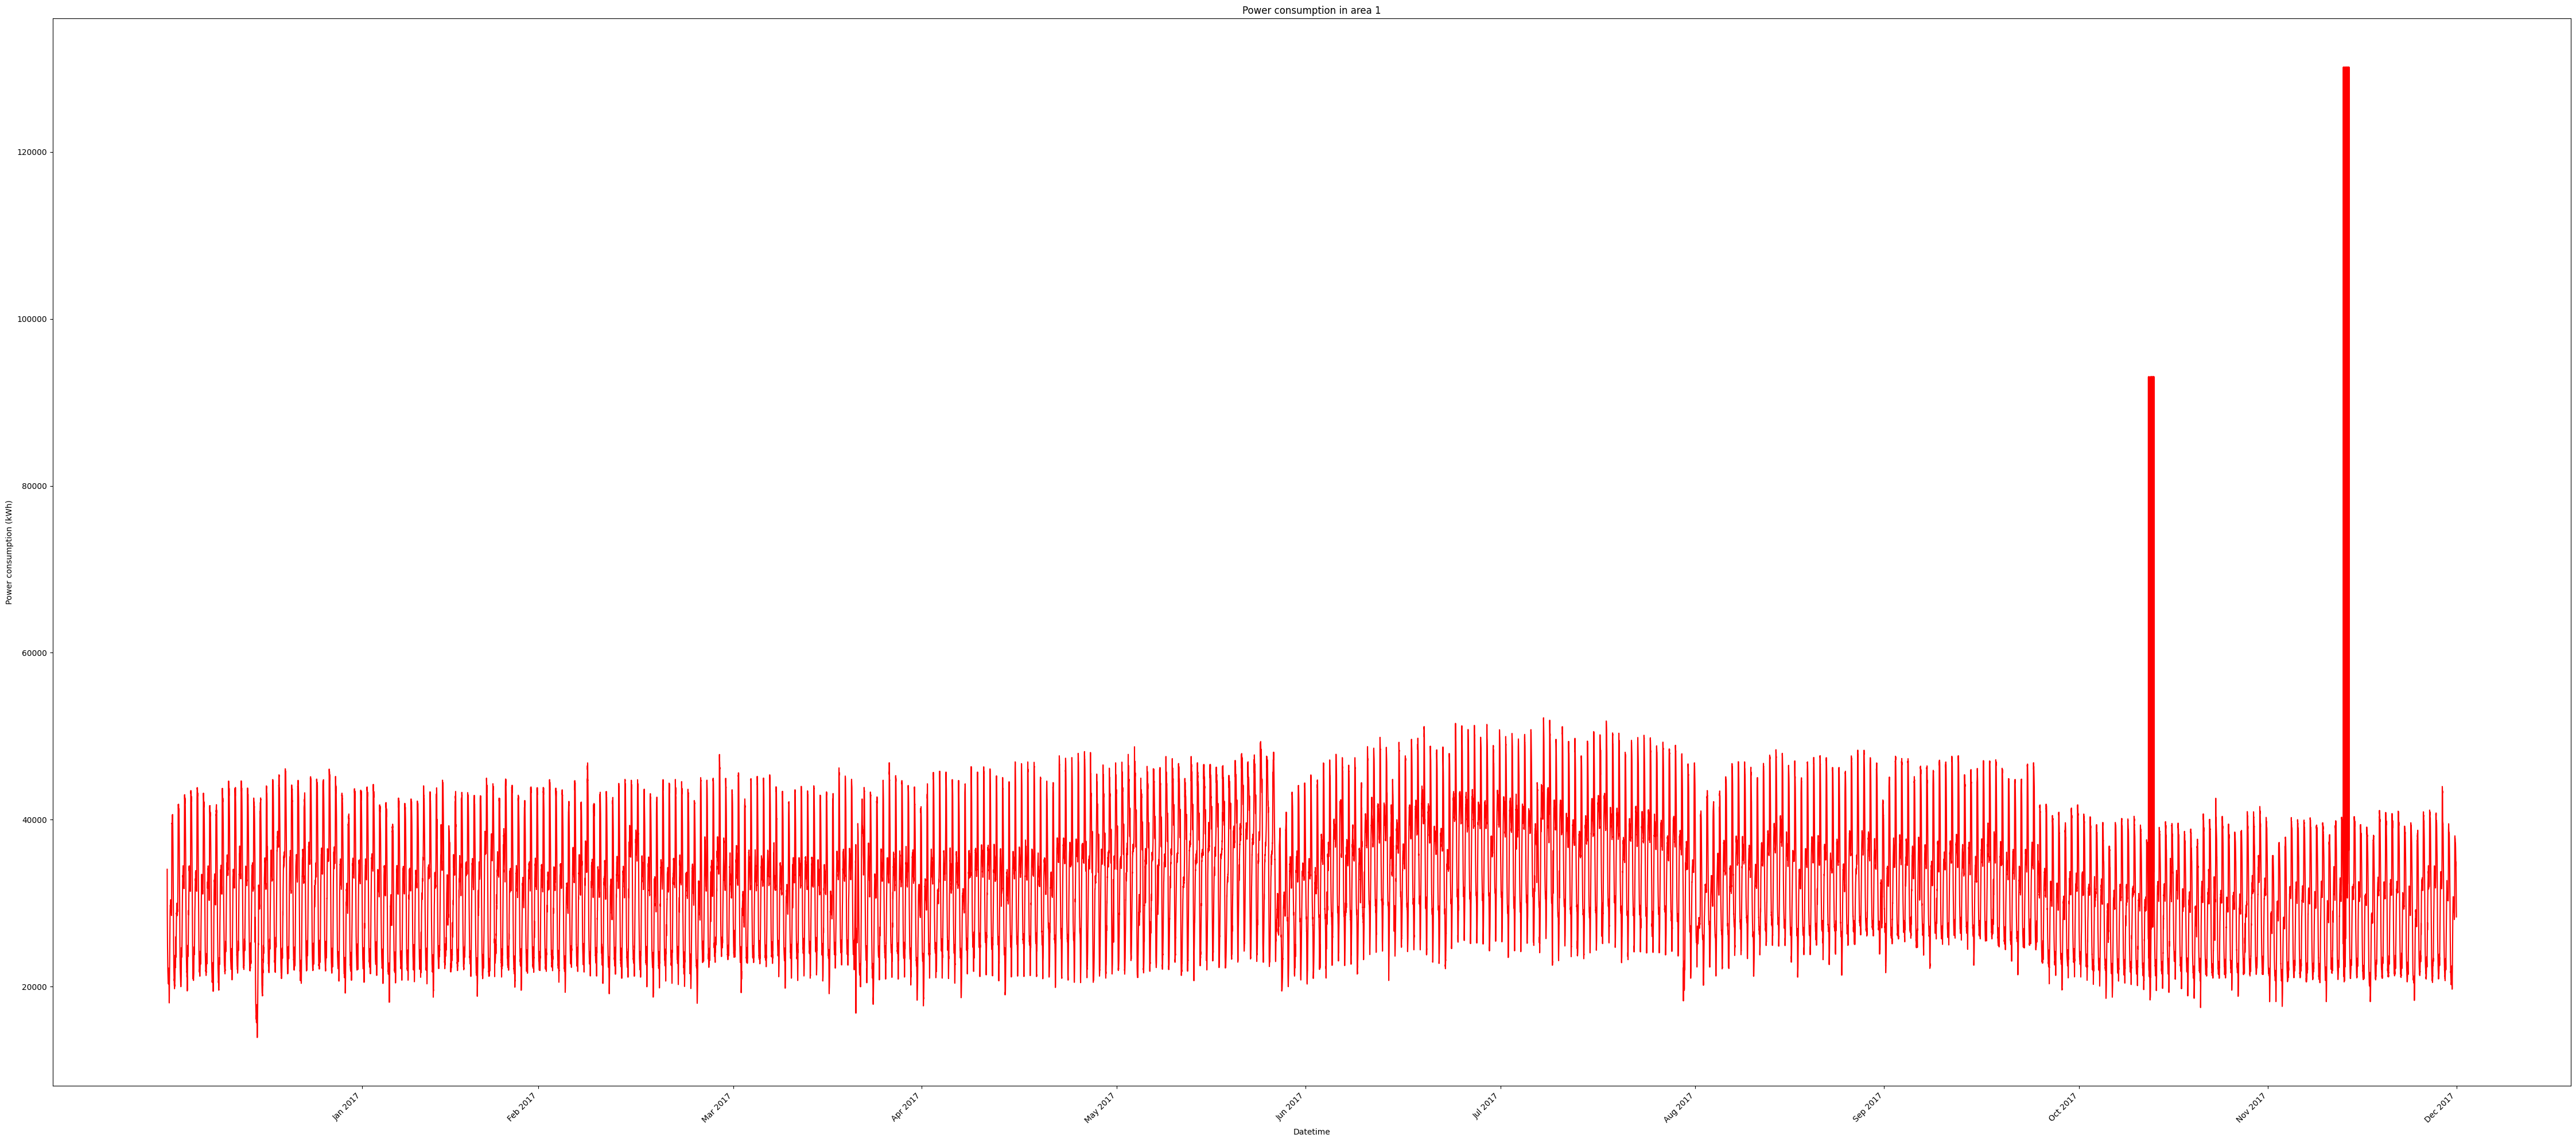

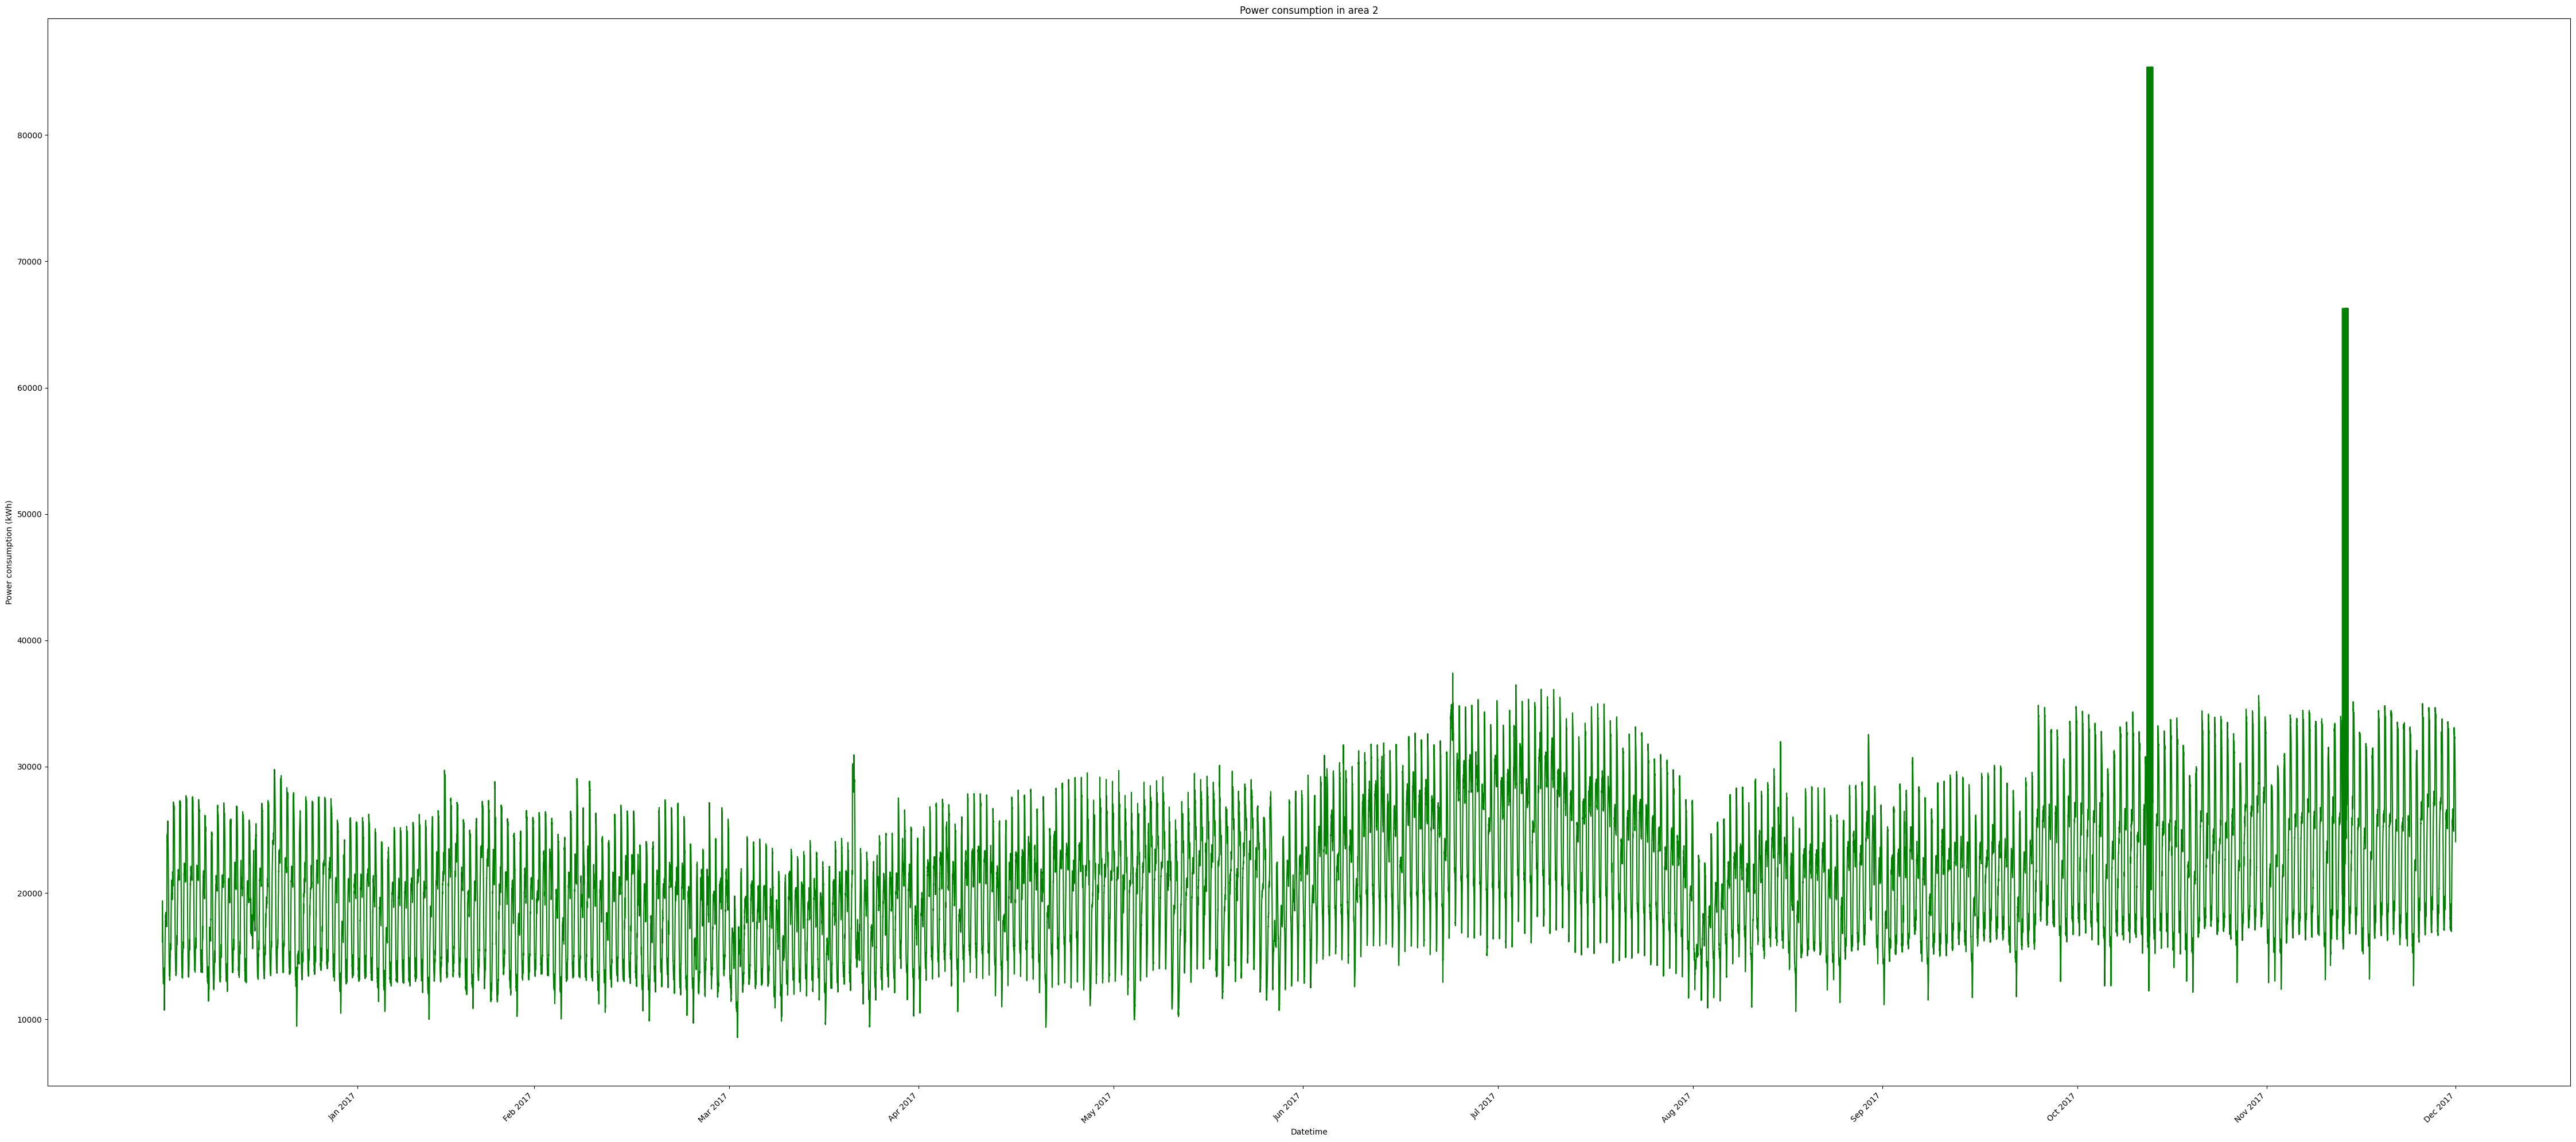

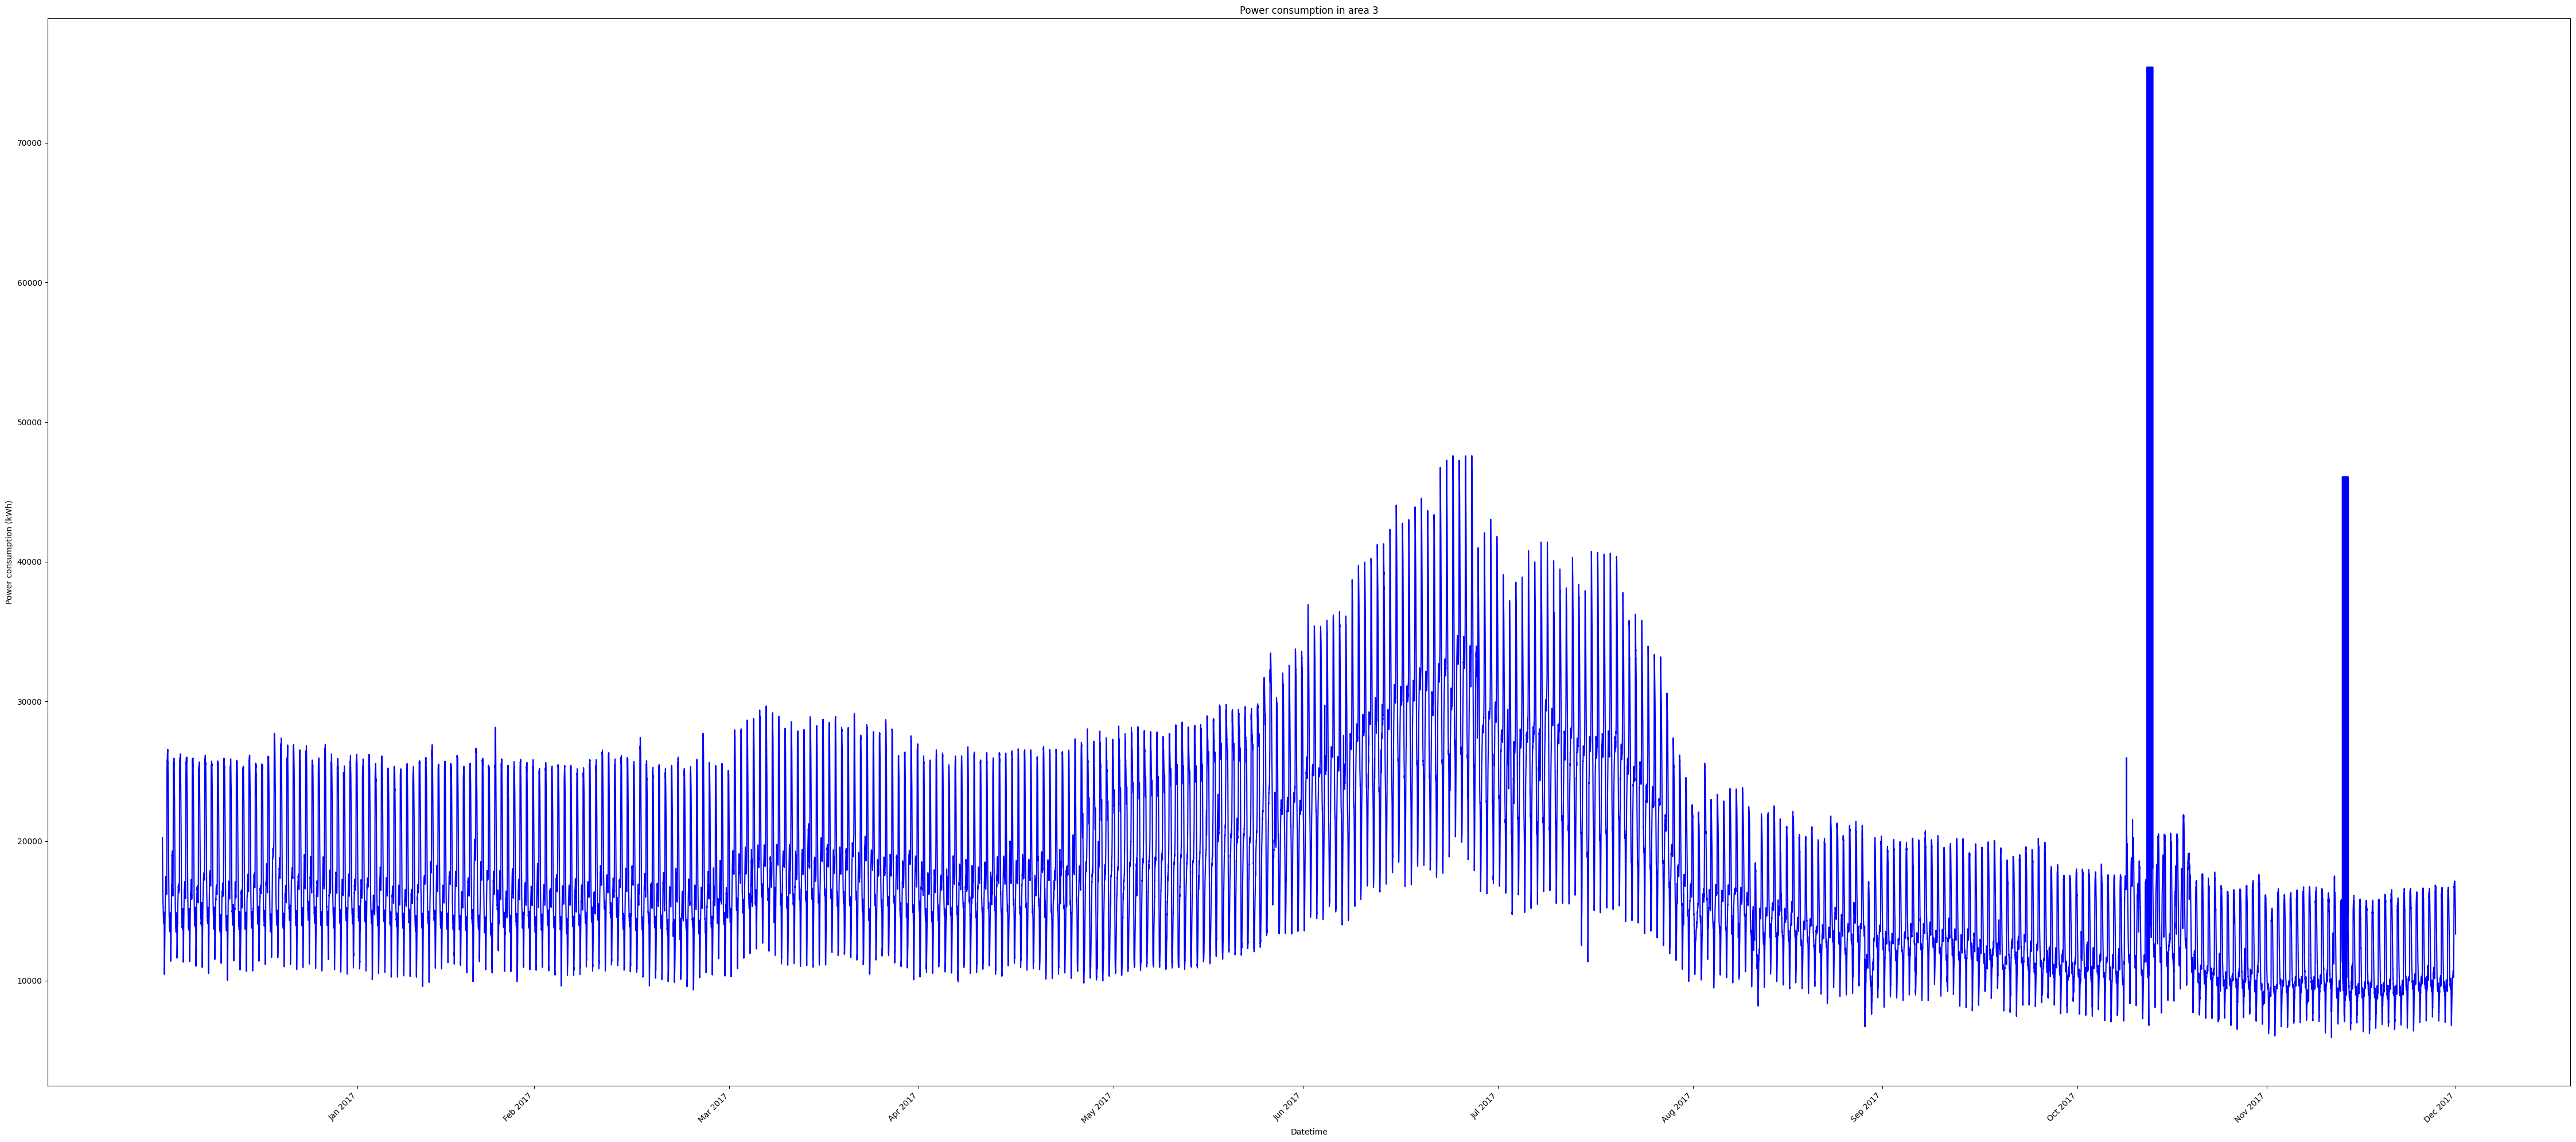

In [ ]:
## Gráficos relacionados as zonas de consumos de energia

## Zona 1
plt.figure(figsize=(45, 20))
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month_Year'] = df['Datetime'].dt.to_period("M")
month_ends = df.groupby('Month_Year')['Datetime'].max()
plt.plot(df['Datetime'], df['PowerConsumption_Zone1'], color='red')
plt.title('Power consumption in area 1')
plt.xlabel('Datetime')
plt.ylabel('Power consumption (kWh)')
plt.xticks(month_ends, month_ends.dt.strftime('%b %Y'), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Zona 2
plt.figure(figsize=(45, 20))
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month_Year'] = df['Datetime'].dt.to_period("M")
month_ends = df.groupby('Month_Year')['Datetime'].max()
plt.plot(df['Datetime'], df['PowerConsumption_Zone2'], color='green')
plt.title('Power consumption in area 2')
plt.xlabel('Datetime')
plt.ylabel('Power consumption (kWh)')
plt.xticks(month_ends, month_ends.dt.strftime('%b %Y'), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Zona 3
plt.figure(figsize=(45, 20))
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month_Year'] = df['Datetime'].dt.to_period("M")
month_ends = df.groupby('Month_Year')['Datetime'].max()
plt.plot(df['Datetime'], df['PowerConsumption_Zone3'], color='blue')
plt.title('Power consumption in area 3')
plt.xlabel('Datetime')
plt.ylabel('Power consumption (kWh)')
plt.xticks(month_ends, month_ends.dt.strftime('%b %Y'), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nomes das colunas disponíveis no DataFrame:
Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Month_Year'],
      dtype='object')
As seguintes colunas não foram encontradas: {'Windspeed'}


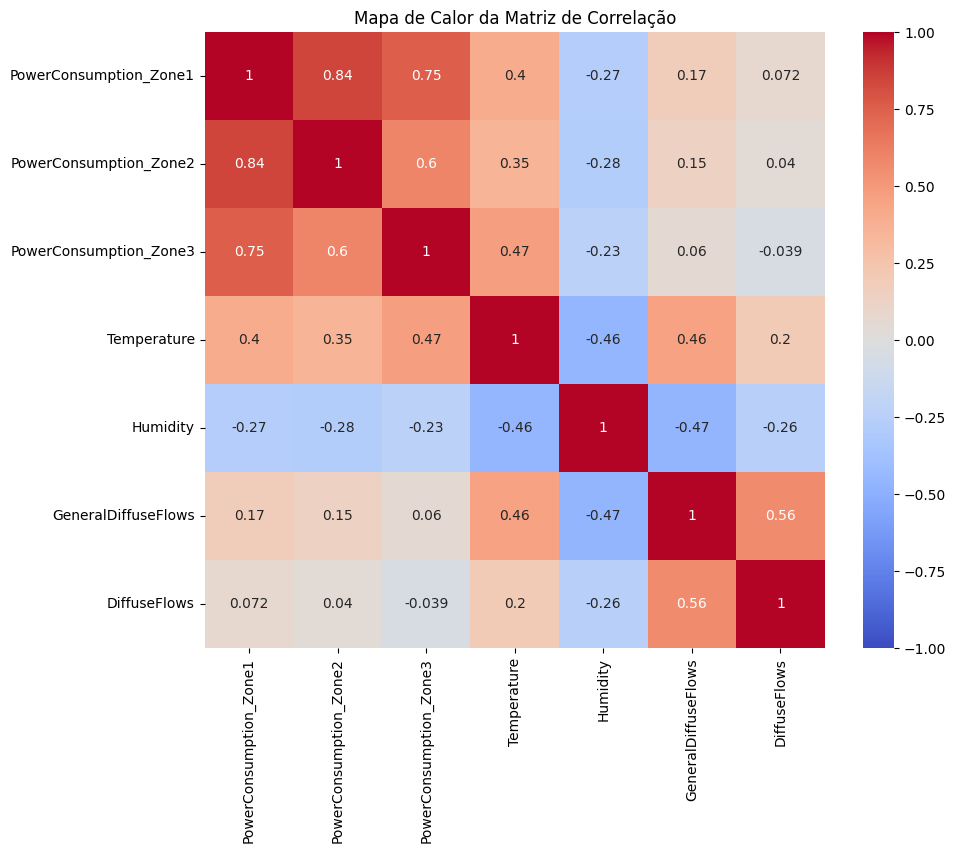

In [ ]:
## Matriz de correlação entre os tipos de dados de toda a base

print("Nomes das colunas disponíveis no DataFrame:")
print(df.columns)
colunas_interesse = [
    'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3',
    'Temperature', 'Humidity', 'Windspeed', 'GeneralDiffuseFlows', 'DiffuseFlows'
]
colunas_existentes = [col for col in colunas_interesse if col in df.columns]
colunas_nao_encontradas = set(colunas_interesse) - set(colunas_existentes)
if colunas_nao_encontradas:
    print(f"As seguintes colunas não foram encontradas: {colunas_nao_encontradas}")
df_selecionado = df[colunas_existentes]
matriz_correlacao = df_selecionado.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

In [ ]:
## Cálculo de dados estatísticos dos dados de energia coletados

if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])  # Converter para formato datetime
else:
    raise ValueError("A coluna 'Datetime' não foi encontrada no DataFrame.")

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Weekday'] = df['Datetime'].dt.day_name()

zonas = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

def calcular_estatisticas(grupo):
    estatisticas = []
    for zona in zonas:
        if zona in grupo:
            dados = grupo[zona].dropna()

            # Cálculo da moda com tratamento robusto
            try:
                moda_valor = mode(dados, nan_policy='omit')
                moda_final = moda_valor.mode[0] if moda_valor.count.size > 0 and moda_valor.count[0] > 0 else np.nan
            except:
                moda_final = np.nan

            estatisticas.append({
                'Zona': zona,
                'Média': np.mean(dados),
                'Mediana': np.median(dados),
                'Moda': moda_final,
                'Variância': np.var(dados, ddof=1),
                'Desvio Padrão': np.std(dados, ddof=1),
                'Coeficiente de Variação (%)': (np.std(dados, ddof=1) / np.mean(dados)) * 100 if np.mean(dados) != 0 else np.nan
            })
    return estatisticas

def organizar_resultados(agrupamento, nome_agrupamento):
    resultados = []
    for grupo, estatisticas in agrupamento.items():
        for estatistica in estatisticas:
            resultado = estatistica.copy()
            resultado[nome_agrupamento] = grupo
            resultados.append(resultado)
    return pd.DataFrame(resultados)

estatisticas_anuais = df.groupby('Year').apply(calcular_estatisticas).to_dict()
estatisticas_anuais_df = organizar_resultados(estatisticas_anuais, 'Ano')

estatisticas_mensais = df.groupby(['Year', 'Month']).apply(calcular_estatisticas).to_dict()
estatisticas_mensais_df = organizar_resultados(estatisticas_mensais, 'Ano-Mês')

estatisticas_diarias = df.groupby('Weekday').apply(calcular_estatisticas).to_dict()
estatisticas_diarias_df = organizar_resultados(estatisticas_diarias, 'Dia da Semana')

print("\nEstatísticas Anuais:")
display(estatisticas_anuais_df)

print("\nEstatísticas Mensais:")
display(estatisticas_mensais_df)

print("\nEstatísticas Diárias por Dia da Semana:")
display(estatisticas_diarias_df)

estatisticas_anuais_df.to_csv('estatisticas_anuais.csv', index=False)
estatisticas_mensais_df.to_csv('estatisticas_mensais.csv', index=False)
estatisticas_diarias_df.to_csv('estatisticas_diarias.csv', index=False)


Estatísticas Anuais:


<ipython-input-10-fc1e7a954f65>:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estatisticas_anuais = df.groupby('Year').apply(calcular_estatisticas).to_dict()
<ipython-input-10-fc1e7a954f65>:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estatisticas_mensais = df.groupby(['Year', 'Month']).apply(calcular_estatisticas).to_dict()
<ipython-input-10-fc1e7a954f65>:54: DeprecationWarning: DataFrameGroupBy.a

Zona         Média       Mediana  Moda     Variância  \
0  PowerConsumption_Zone1  32435.122077  32281.518990   NaN  5.810139e+07   
1  PowerConsumption_Zone2  21099.248030  20828.174335   NaN  3.039953e+07   
2  PowerConsumption_Zone3  17888.703956  16426.884580   NaN  4.608500e+07   

   Desvio Padrão  Coeficiente de Variação (%)   Ano  
0    7622.426646                    23.500533  2017  
1    5513.576832                    26.131627  2017  
2    6788.593548                    37.949052  2017


Estatísticas Mensais:


Zona         Média       Mediana  Moda     Variância  \
0   PowerConsumption_Zone1  31034.775160  31686.075950   NaN  5.471071e+07   
1   PowerConsumption_Zone2  19390.129370  19652.279640   NaN  2.043473e+07   
2   PowerConsumption_Zone3  17746.787460  16481.927710   NaN  1.967940e+07   
3   PowerConsumption_Zone1  30985.753632  31609.830510   NaN  4.718375e+07   
4   PowerConsumption_Zone2  18787.793096  19305.775075   NaN  1.928371e+07   
5   PowerConsumption_Zone3  17335.002154  16237.989950   NaN  1.900946e+07   
6   PowerConsumption_Zone1  31141.647475  31680.000000   NaN  4.594368e+07   
7   PowerConsumption_Zone2  18456.626081  18867.073170   NaN  1.743994e+07   
8   PowerConsumption_Zone3  16941.593275  15990.967740   NaN  1.808677e+07   
9   PowerConsumption_Zone1  31169.768210  31769.903120   NaN  4.206379e+07   
10  PowerConsumption_Zone2  17633.966395  17758.044805   NaN  1.469881e+07   
11  PowerConsumption_Zone3  18593.167677  18007.272730   NaN  2.065529e+07   
12  PowerConsumption_Zone1  32396.009166  33024.000000   NaN  4.626365e+07   
13  PowerConsumption_Zone2  19977.287859  20663.777090   NaN  1.746507e+07   
14  PowerConsumption_Zone3  17621.100953  17175.060730   NaN  1.899081e+07   
15  PowerConsumption_Zone1  34605.540839  35450.066230   NaN  5.354030e+07   
16  PowerConsumption_Zone2  20670.928621  21244.490640   NaN  1.986924e+07   
17  PowerConsumption_Zone3  20430.941538  20171.815385   NaN  3.143744e+07   
18  PowerConsumption_Zone1  35831.553603  36307.774085   NaN  4.869226e+07   
19  PowerConsumption_Zone2  24147.886893  24522.151895   NaN  2.466571e+07   
20  PowerConsumption_Zone3  28194.111216  27857.071130   NaN  4.807563e+07   
21  PowerConsumption_Zone1  36427.400379  37417.624860   NaN  4.969957e+07   
22  PowerConsumption_Zone2  24621.994754  24998.521650   NaN  2.647626e+07   
23  PowerConsumption_Zone3  24648.766643  24725.266460   NaN  4.222497e+07   
24  PowerConsumption_Zone1  33396.681416  33288.849560   NaN  4.228843e+07   
25  PowerConsumption_Zone2  20180.432259  20176.091475   NaN  1.781965e+07   
26  PowerConsumption_Zone3  14922.798774  14252.911135   NaN  1.182423e+07   
27  PowerConsumption_Zone1  32827.660055  32631.597370   NaN  4.214038e+07   
28  PowerConsumption_Zone2  21468.993441  21570.124480   NaN  2.130678e+07   
29  PowerConsumption_Zone3  13264.095173  12541.276600   NaN  9.566346e+06   
30  PowerConsumption_Zone1  29442.810937  29470.769230   NaN  6.198195e+07   
31  PowerConsumption_Zone2  23675.779701  23139.669420   NaN  5.503316e+07   
32  PowerConsumption_Zone3  13269.213464  11705.060240   NaN  3.831940e+07   
33  PowerConsumption_Zone1  29698.026156  29405.323195   NaN  1.061152e+08   
34  PowerConsumption_Zone2  23966.854741  23731.205890   NaN  4.446504e+07   
35  PowerConsumption_Zone3  11282.466664   9914.045619   NaN  1.628286e+07   

    Desvio Padrão  Coeficiente de Variação (%)     Ano-Mês  
0     7396.668948                    23.833486   (2017, 1)  
1     4520.478457                    23.313297   (2017, 1)  
2     4436.147228                    24.996903   (2017, 1)  
3     6869.042633                    22.168390   (2017, 2)  
4     4391.322168                    23.373273   (2017, 2)  
5     4359.983745                    25.151331   (2017, 2)  
6     6778.176405                    21.765632   (2017, 3)  
7     4176.115357                    22.626646   (2017, 3)  
8     4252.854633                    25.103038   (2017, 3)  
9     6485.660448                    20.807535   (2017, 4)  
10    3833.902391                    21.741577   (2017, 4)  
11    4544.808792                    24.443435   (2017, 4)  
12    6801.738885                    20.995607   (2017, 5)  
13    4179.123200                    20.919372   (2017, 5)  
14    4357.844657                    24.730831   (2017, 5)  
15    7317.124026                    21.144371   (2017, 6)  
16    4457.492438                    21.564065   (2017, 6)  
17    5606.910346                    


Estatísticas Diárias por Dia da Semana:


Zona         Média       Mediana  Moda     Variância  \
0   PowerConsumption_Zone1  32338.995905  32256.000000   NaN  4.830645e+07   
1   PowerConsumption_Zone2  21461.038263  21378.358790   NaN  2.386639e+07   
2   PowerConsumption_Zone3  17545.971382  16046.236365   NaN  4.272118e+07   
3   PowerConsumption_Zone1  32581.840646  32654.867260   NaN  5.171022e+07   
4   PowerConsumption_Zone2  21239.609130  20908.130940   NaN  2.718727e+07   
5   PowerConsumption_Zone3  17755.330165  16426.884580   NaN  4.251937e+07   
6   PowerConsumption_Zone1  32277.927373  32242.550305   NaN  4.954477e+07   
7   PowerConsumption_Zone2  20600.161009  20336.718480   NaN  2.516056e+07   
8   PowerConsumption_Zone3  18061.707299  16717.623275   NaN  4.553540e+07   
9   PowerConsumption_Zone1  31034.331846  30442.212770   NaN  6.478911e+07   
10  PowerConsumption_Zone2  19230.521099  18219.840395   NaN  4.302814e+07   
11  PowerConsumption_Zone3  18189.472096  16605.771260   NaN  5.734017e+07   
12  PowerConsumption_Zone1  32844.202607  32919.493670   NaN  5.104437e+07   
13  PowerConsumption_Zone2  21863.949297  21530.699090   NaN  2.768846e+07   
14  PowerConsumption_Zone3  17845.249162  16464.738460   NaN  4.344416e+07   
15  PowerConsumption_Zone1  32713.030148  32673.310140   NaN  5.078961e+07   
16  PowerConsumption_Zone2  21518.599887  21231.834085   NaN  2.662929e+07   
17  PowerConsumption_Zone3  17831.688173  16412.530120   NaN  4.419614e+07   
18  PowerConsumption_Zone1  33260.523092  33028.144575   NaN  8.764965e+07   
19  PowerConsumption_Zone2  21791.786901  21460.975610   NaN  3.415498e+07   
20  PowerConsumption_Zone3  17988.507025  16481.125630   NaN  4.657520e+07   

    Desvio Padrão  Coeficiente de Variação (%) Dia da Semana  
0     6950.284262                    21.491961        Friday  
1     4885.324431                    22.763691        Friday  
2     6536.143788                    37.251536        Friday  
3     7190.981863                    22.070521        Monday  
4     5214.141662                    24.549141        Monday  
5     6520.687684                    36.725240        Monday  
6     7038.804486                    21.806866      Saturday  
7     5016.030608                    24.349473      Saturday  
8     6747.992166                    37.360766      Saturday  
9     8049.168480                    25.936336        Sunday  
10    6559.584024                    34.110277        Sunday  
11    7572.329344                    41.630286        Sunday  
12    7144.534110                    21.752801      Thursday  
13    5261.982307                    24.066934      Thursday  
14    6591.218233                    36.935423      Thursday  
15    7126.682852                    21.785456       Tuesday  
16    5160.357091                    23.980915       Tuesday  
17    6648.017385                    37.282042       Tuesday  
18    9362.139114                    28.147901     Wednesday  
19    5844.226139                    26.818481     Wednesday  
20    6824.602339                    37.938681     Wednesday

<ipython-input-11-af3c52cf4320>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[zone].resample(freq).mean()


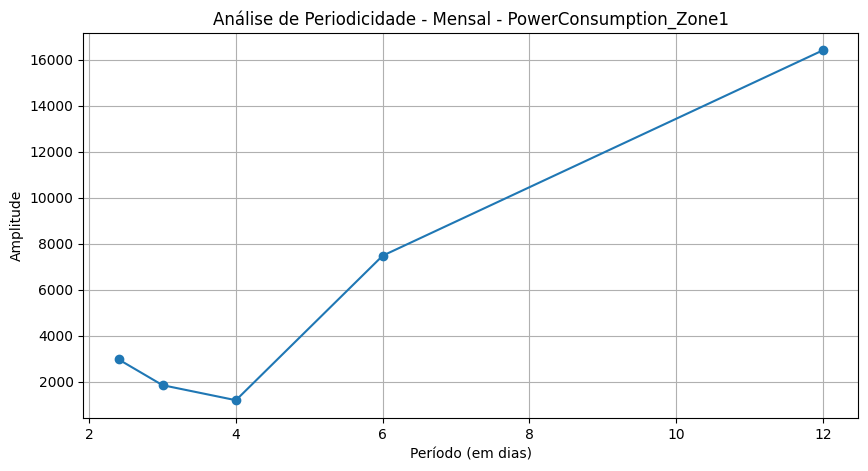

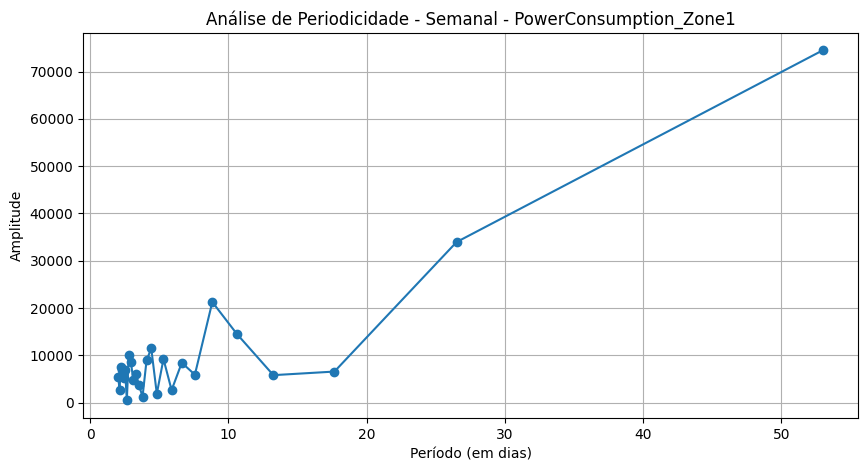

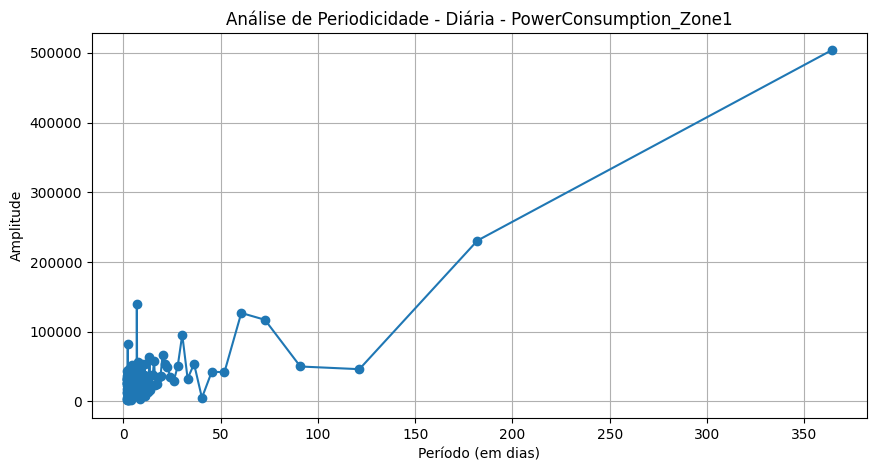

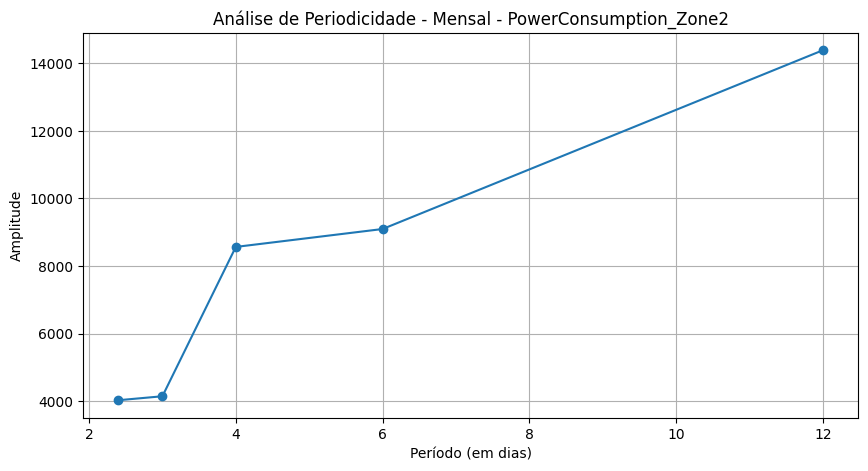

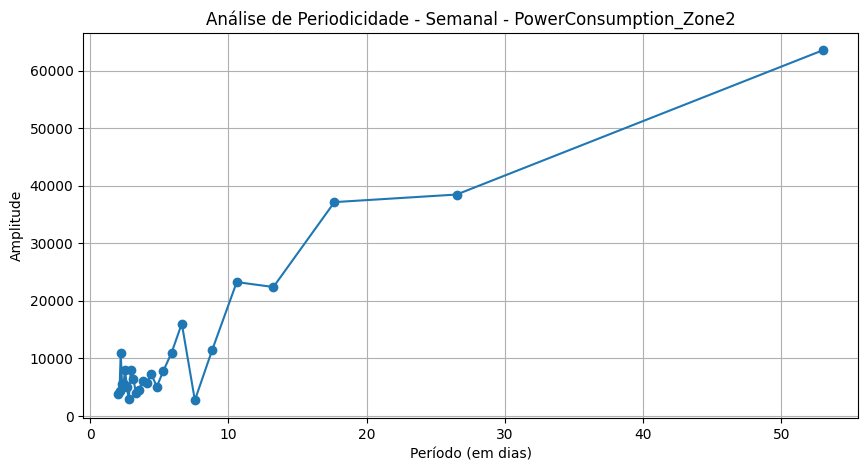

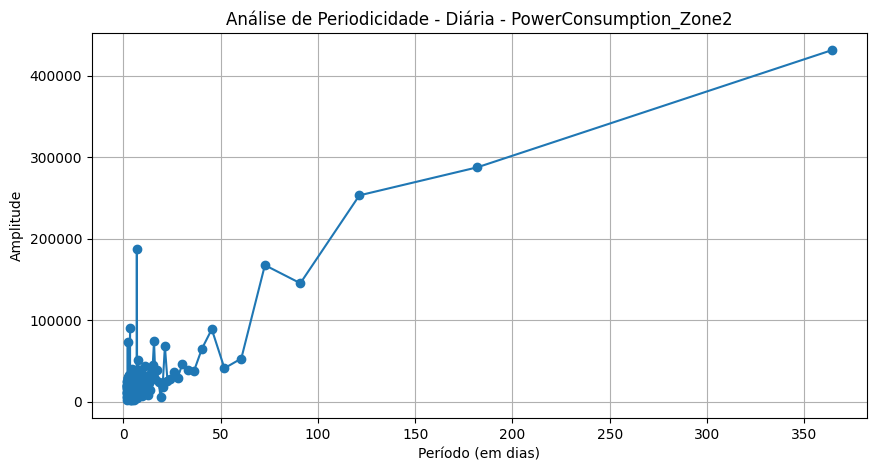

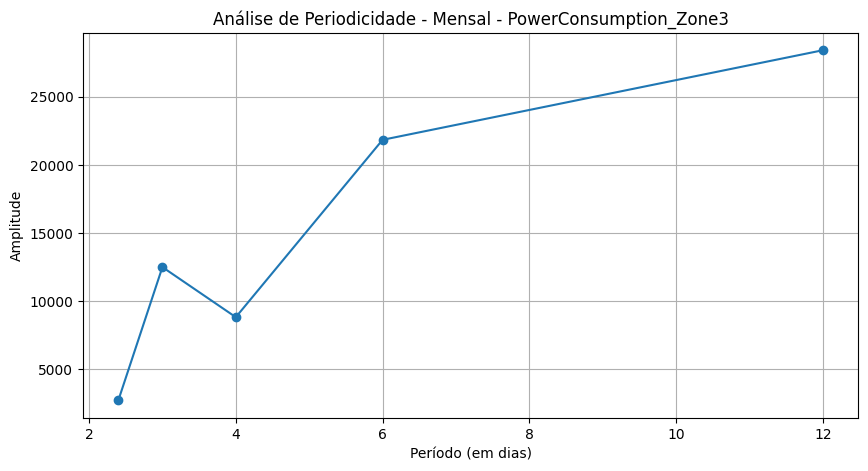

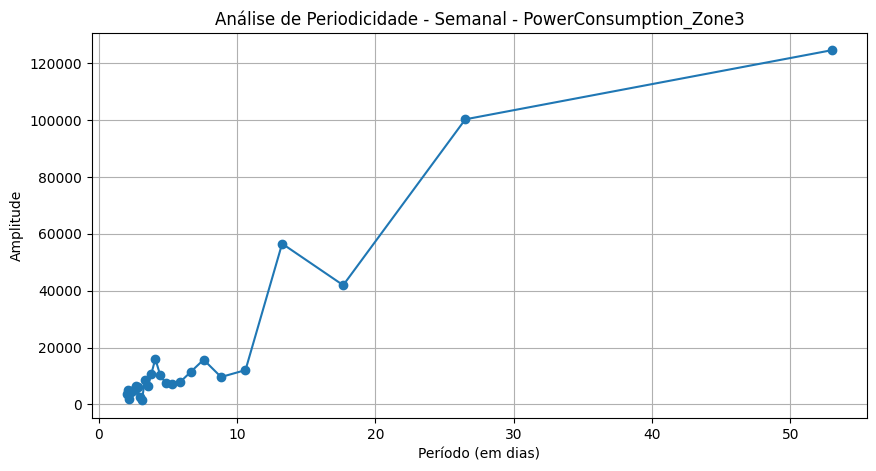

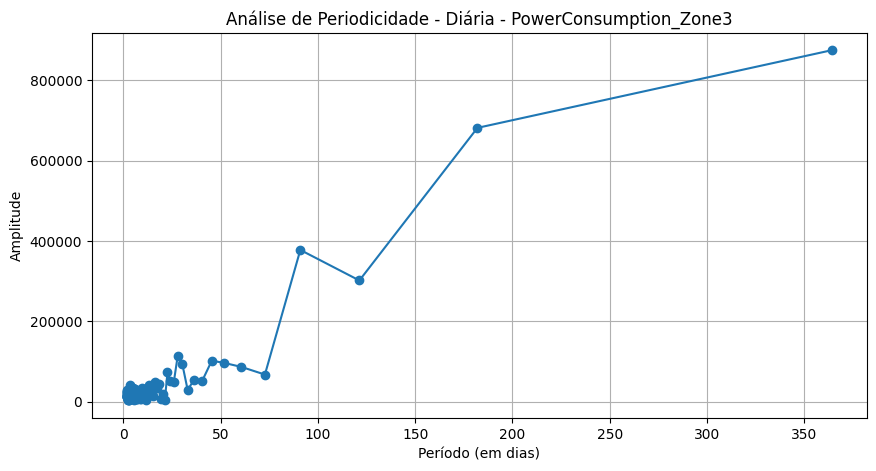

In [ ]:
# Função para realizar análise FFT e visualizar periodicidades
def analyze_fft(df, zone, freq, title):
    """
    Realiza a análise FFT para uma zona de consumo e plota o gráfico da periodicidade.

    Parâmetros:
        df (pd.DataFrame): Conjunto de dados.
        zone (str): Nome da zona de consumo.
        freq (str): Frequência de reamostragem ('D', 'W', 'M' etc.).
        title (str): Título do gráfico.
    """
    # Verificar se o índice já é 'Datetime', caso contrário, configurá-lo
    if 'Datetime' in df.columns:
        df = df.set_index('Datetime')

    # Reamostrar os dados na frequência desejada e calcular a média
    resampled = df[zone].resample(freq).mean()

    # Aplicar a FFT
    fft_values = np.fft.fft(resampled - resampled.mean())
    fft_freq = np.fft.fftfreq(len(fft_values))

    # Frequência positiva apenas
    mask = fft_freq > 0
    fft_values = fft_values[mask]
    fft_freq = fft_freq[mask]

    # Plotar os resultados
    plt.figure(figsize=(10, 5))
    plt.plot(1 / fft_freq, np.abs(fft_values), marker='o')
    plt.title(f"Análise de Periodicidade - {title}")
    plt.xlabel("Período (em dias)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Executar FFT para cada zona em cada periodicidade
frequencias = ['M', 'W', 'D']  # Mensal, semanal e diária
labels = ['Mensal', 'Semanal', 'Diária']

for zona in zonas:
    for freq, label in zip(frequencias, labels):
        analyze_fft(df, zona, freq, f"{label} - {zona}")

In [ ]:
# Função de treinamento de modelos
normal_data = pd.read_csv('https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption.csv')
attack_data = pd.read_csv('https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption_modified.csv')
def train_attack_detection_model(normal_data, attack_data):
    normal_data['Attack'] = 0  # Dados normais marcados como 0
    attack_data['Attack'] = 1  # Dados adulterados marcados como 1

    combined_data = pd.concat([normal_data, attack_data], axis=0).reset_index(drop=True)

    # Separar variáveis independentes e dependentes
    X = combined_data.drop(columns=['Attack', 'Datetime'])  # Exclui colunas irrelevantes
    y = combined_data['Attack']

    # Escalar os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Modelo Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    # Modelo ANN
    ann_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)
    ann_model.fit(X_train, y_train)
    ann_predictions = ann_model.predict(X_test)

    # Resultados
    results = {
        "RandomForest": {
            "model": rf_model,
            "report": classification_report(y_test, rf_predictions)
        },
        "ANN": {
            "model": ann_model,
            "report": classification_report(y_test, ann_predictions)
        },
        "scaler": scaler
    }
    return results

# Função de detecção em novos dados
new_data = pd.read_csv('https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption_subtle_attacks.csv')
def detect_anomalies(new_data, models):
    X_new = new_data.drop(columns=['Datetime'])  # Ajustar para excluir colunas irrelevantes
    X_scaled = models['scaler'].transform(X_new)

    # Predição
    rf_predictions = models['RandomForest']['model'].predict(X_scaled)
    ann_predictions = models['ANN']['model'].predict(X_scaled)

    # Adicionar resultados ao DataFrame
    new_data['RF_Attack_Prediction'] = rf_predictions
    new_data['ANN_Attack_Prediction'] = ann_predictions

    return new_data

# Exemplo de uso:
normal_data = pd.read_csv('https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption.csv')
attack_data = pd.read_csv('https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption_modified.csv')
results = train_attack_detection_model(normal_data, attack_data)
new_data = pd.read_csv('https://raw.githubusercontent.com/NillipsGerowald/FINAL-PROJECT---SCIENTIFIC-DATA-ANALYSIS/refs/heads/main/powerconsumption_subtle_attacks.csv')
detected_data = detect_anomalies(new_data, results)
